# Why/Motivation: 

1. I was really intrigued by the recent development of Anthropic's chatbot, Claude, a supposedly more ethical chatbot compared to openAI's, chatGPT. I really wanted to test its capabilities of being more "ethical" to see if it was measuring up to its value proposition.

2. I wanted to do sentiment analysis of responses across the world wide web to see which chatbot is most trusted.

3. [x] Good for me to get updated on NLP techniques.

4. Fun to see how the world thinks of chatGPT/Claude and what they think of themselves. (turning Q & A on themselves. self-introspection)

5. [x] Wanted to see if can do sentiment analysis across multiple emotions to not have such a Black and White assessment of statements since feelings/people's positions are usually not polar, but spead across a variety of feelings.

6. Not just explore Twitter (X) and Reddit, but also pop songs for real-time relevant responses.

7. Look at fresh time series data.

8. [x] Explore a different viz py lib: d3.js to build more sophisticated, interactive viz for web portfolio - not realistic since d3.js has steep learning curve before getting easy and usually just for NYT publications, not stakeholders who need quick answers to make fast decisions~~

# Business Recommendation:

Thought this would be a nice twist on sentiment analysis on product launches. This is something I was looking to do since coming from product analytics, experimentation looked at event signals versus what people were actually saying about the product. People say that actions are louder than words, but words also speak volumes. Would have been nice to have complemented by experimentation resuslts with some sort of sentiment analysis. Would have added more weight, been more comprehensive assessment of new feature launches.

# 1. Define metrics of success (its value prop, for business) for helpful chatbot

Doing sentiment analysis, so metric of success is if customers are happy (positive sentiment) with the product.

* After getting some user responses/opinions, this helps us understand the data.

* And when we understand the data, we can better utilize it to measure against our metrics of success for or GenAI chatbot battle.

*Metrics that are different from social media opinion because it is through the lens of developers/business. 

*Scraping social media helps inform product success as well, but measurement is pure sentiment. Analyzing cause for sentiment is key for product feature validation or product feature exploration. And the cause is sought from text/comments. 

*Sentiment analysis supplements new product evaluation by giving users' a 'voice'.

# Metrics of Success (Product (fulfill intended purpose) vs Business (objectives), Leading (engage users effectively)/Lagging, Composite); categories: user, conversational, commercial

1. How precise is the answer/is it relevant?
2. What is the quality of the answer (thoroughness and depth)?

Other:
Ref: https://www.youtube.com/watch?v=xjEu9t1nJag
1. Tokens (prompt size limit)
2. Image Recognition
3. Image Creation
4. Web Access
5. Supported Languages
6. Voice Chat
7. Analyze PDF's
8. Math ability
9. Long Text Summarization
10. Availability

Llama Paper:
1. Commonsense Reasoning
2. World Knowledge
3. Reading Comprehension
4. Math
5. MMLU (5 Shot)?
6. BBH (BigBench Hard)?
7. AGI Eval (3-5 Shot)

Overall Best Metrics from Asking all Metrics Measuring Performance On:

* Perplexity
* BLEU Score (Bilingual Evaluation Understudy Score) - similarity between ref and generated txt
* ROUGE (Recall-Oriented Understudy for Gisting Evaluation) - how accurate are summaries
* Human Evaluation
* Engagement Metrics (conversion rate/win rate, average conversion duration, # msg's exchanged, user satisfaction, volume of active user sessions, bounce rate, satisfaction rate, retention rate)
* Diversity and Novelty
* Context Coherence

* Appropriateness
* Sentiment Accuracy
* Question Answering Accuracy/Task Accuracy Rate/NLP Accuracy/Comprehension Capabilities
* Dialog Breakdown Rate/Error Rate/Fallback Rate
* Human Likeness/Response Generation Fluency
* Task Success Rate/Task Completion Rate/Average Cycle Length/Goal Completion Rate/Self-Service Rate
* Efficiency/Average Resolution Time

* Cost Savings
* Brand Perception
* Sales Revenue
* Personalization
* Adaptability
* Scalability
* Average Contract Value
* Questions Per Conversation/ AI chatbot interaction rate
* Chatbot usage distribution per hour
* Conversation starter messages 

* Total users

Due to content being analyzed is users' opinions, then metric of interest will be: 

* Brand Perception
* User Satisfaction 

Both are vital to get a pulse on overall user sentiment of company as well as immediate sentiment after new product feature release.

# 2. Scrape:
* ~Twitter~ have to pay for scrape; no bueno
* [x] Reddit (1000 cap)
* Threads
* BlueSky
* Mastodon (spam, search sucks)?
* Substack/Substack Notes
* Medium
* [x] YouTube
* LinkedIn
* Song Lyrics

to get info on following chatbots to do analysis on:
* chatGPT (OpenAI)
* Claude (Anthropic)
* Bard (Google)
* Bing Chat (Microsoft, images, voice chat)
* Perplexity AI (advancing how people discover and share information)
* Pi (empathetic/human emotions)

# 3. [x] Visualizations on User Emotions

# 4.[x] Other NLP-related analyses (e.g. Topic Modeling)

# Loading Libraries

In [1]:
! pip3 install -U nltk[twitter] --quiet
! pip install -q transformers --quiet
! pip install plotly==5.18.0 --quiet
! pip install cufflinks --upgrade --quiet
! pip install clean-text --quiet
! pip install emoji --quiet
! pip install emoji_translate --quiet
! python -m spacy download en_core_web_md --quiet
! pip install -U pytextrank --quiet
! pip install praw --quiet
! pip install contractions --quiet
! pip install contractions --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
import os
from pprint import pprint

# API's
import googleapiclient.discovery #YouTube
import googleapiclient.errors
import praw # Reddit
from praw.models import MoreComments

# Data Manipulations
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import json
from datetime import datetime 

# Text Pre-processing
import re
import emoji
from emoji_translate.emoji_translate import Translator
import contractions

# Sentiment Scores
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from textblob import TextBlob
# from google.cloud import language

# Text Parsing
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pytextrank

# Visualizations
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from plotly.offline import iplot
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from IPython.display import IFrame 

# Topic Modeling
import scattertext as st
import spacy
nlp = spacy.load('en_core_web_md')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from sklearn.manifold import TSNE

Loading BokehJS ...

In [3]:
credentials2 = json.load(open('/kaggle/input/credentials2/credentials.json'))

In [4]:
# YouTube Video ID's

# ChatGPT: "2AdkSYWB6LY"
# Claude: "yoP7XAw3gYg"
# Bard: "3wySA9DbaOw"
# Bing Chat: "qkQoX8P4jUw"
# Perplexity AI: ""
# Pi: "l-QHJXMnwcA"

# Getting Comments from Popular App's with Users' Opinions

## Scraping YouTube 
All top-level comments (no replies) per video

Reference: https://github.com/analyticswithadam/Python/blob/main/YouTube_Comments_Advanced.ipynb

In [5]:
# YouTube credentials
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = credentials2["youtube_api_key"]

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

In [6]:
def getcomments(video):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video,
        maxResults=100
    )

    comments = []

    response = request.execute()

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['likeCount'],
            comment['textOriginal'],
            comment['videoId']
        ])

    while (1 == 1):
        try:
            nextPageToken = response['nextPageToken']
        except KeyError:
            break
        nextPageToken = response['nextPageToken']
        # Create a new request object with the next page token.
        nextRequest = youtube.commentThreads().list(part="snippet", videoId=video, maxResults=100, pageToken=nextPageToken)
        # Execute the next request.
        response = nextRequest.execute()
        # Get the comments from the next response.
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            published_at = comment['publishedAt']
#             published_at = datetime.fromtimestamp(comment['publishedAt']) #UTC
#             published_at = pd.to_datetime(published_at, format='%Y-%m-%dT%H:%M:%SZ')
            comments.append([
                comment['authorDisplayName'],
                published_at,
#               published_at.date,
#               published_at.month,
                comment['likeCount'],
                comment['textOriginal'],
                comment['videoId']
            ])

    df0 = pd.DataFrame(comments, columns = ['author', 'published_at', 'like_count', 'text', 'video_id'])
    return df0

In [7]:
# Get all chatbot comments from YouTube

# vids = [ChatGPT, ChatGPT, Claude, Claude, Bard, Bard, Bing Chat, Bing Chat, Pi, Pi]
vids = ["2AdkSYWB6LY", "qe1zRvoqt3Q", "yoP7XAw3gYg", "i06nAiJTMOE", "3wySA9DbaOw", "-a6E-r8W2Bs", "qkQoX8P4jUw", "iSwBvKWo66I", "l-QHJXMnwcA", "64OxlZw8w40"]

df0 = pd.DataFrame()

for v in vids:
    df1 = getcomments(v)
    df0 = pd.concat([df0, df1]) # Combine all df's together into one big dataframe

df0.sample(5)

author          published_at  like_count  \
37         @sirlancealittles  2023-06-18T07:18:23Z           0   
156                @arie1994  2023-03-18T06:00:19Z           1   
55     @SharathKamaraj-bq8gc  2023-03-22T09:27:18Z           0   
118            @yenespace406  2023-03-19T09:42:43Z           1   
1334  @atishbhattacharya3473  2023-12-06T18:33:34Z           0   

                                                                                          text  \
37         It's habitually Fabricates anything. It doesn't have a knowledge of current events.   
156                                          "Open"ai -even the size of the model is a secret.   
55                             even before this chatsonic used to search from internet as well   
118   I feel like am in debt to you. Thank You for such content, I wouldn't have read 5 pages.   
1334                                            We're slowly aweakning a god, just be careful!   

         video_id  
37    l-QHJXMnwcA  
156   2AdkSYWB6LY  
55    iSwBvKWo66I  
118   2AdkSYWB6LY  
1334  -a6E-r8W2Bs

In [8]:
# Proper date formats
df0['published_at'] = pd.to_datetime(df0['published_at'], format='%Y-%m-%dT%H:%M:%SZ')
df0['published_at_date'] = df0['published_at'].dt.date
df0['published_at_month'] = df0['published_at'].dt.month

In [9]:
# Rename video id's to appropriate chat bot
df0['video_id'] = df0['video_id'].map({'2AdkSYWB6LY' : 'ChatGPT', 'qe1zRvoqt3Q' : 'ChatGPT', 'yoP7XAw3gYg' : 'Claude', 'i06nAiJTMOE' : 'Claude', '3wySA9DbaOw' : 'Bard', '-a6E-r8W2Bs' : 'Bard', 'qkQoX8P4jUw' : 'Bing Chat', 'iSwBvKWo66I' : 'Bing Chat', 'l-QHJXMnwcA' : 'Pi', '64OxlZw8w40' : 'Pi'})
df0.rename(columns = {'video_id':'chatbot'}, inplace=True)
df0.sample(5)

author        published_at  like_count  \
217  @Mrcheekymonkeyisback 2023-12-15 16:08:25           1   
231                @tehdii 2023-03-16 07:37:51           1   
40        @jackdonahue8773 2023-09-30 00:53:21           0   
248           @jasonmandel 2023-03-15 21:16:53           1   
579         @yanamorim5747 2023-12-08 18:52:38           0   

                                                                                                                                                                                text  \
217  as if youre concerned whether its offensive or hurtful. AI does not give a shit about feelings but facts and facts alone. becareful what prejudice and biases you imprint on AI   
231                                                                                                                                                                         Nexus 4?   
40                                                                                                      Let me guess...it doesn't work  but you make off like a bandit with AD time.   
248                                                                                                                                             Fantastic breakdown. Thanks so much!   
579                                                                                                                     what will gemini do if i ask it to speak in machine language   

     chatbot published_at_date  published_at_month  
217     Bard        2023-12-15                  12  
231  ChatGPT        2023-03-16                   3  
40   ChatGPT        2023-09-30                   9  
248  ChatGPT        2023-03-15                   3  
579     Bard        2023-12-08                  12

In [10]:
df0['chatbot'].value_counts()

chatbot
Bard         1428
ChatGPT       704
Pi            234
Bing Chat     149
Claude         88
Name: count, dtype: int64

In [11]:
df0['app'] = 'YouTube'

In [12]:
len(df0)

2603

## Scraping Reddit

References: 
1. https://vtiya.medium.com/how-to-scrape-reddit-data-in-2023-1613230f9e4d
1. https://www.geeksforgeeks.org/scraping-reddit-using-python/
1. https://praw.readthedocs.io/en/stable/tutorials/comments.html
1. https://www.geeksforgeeks.org/python-praw-getting-the-time-when-a-comment-was-posted-on-reddit/

### Testing how to get Reddit data of interest
#### Get Posts First

In [13]:
# Reddit credentials
reddit = praw.Reddit(client_id=credentials2["reddit_client_id"],
                     client_secret=credentials2["reddit_client_secret"],
                     user_agent=credentials2["reddit_user_agent"])

In [14]:
chatgpt_subreddit = reddit.subreddit('ChatGPT')

# Retrieve posts from the subreddit
posts = chatgpt_subreddit.new(limit=900)  # Use the "new" method to retrieve new posts

# Create a list to store the post data
post_data = []

# Iterate over the posts and extract relevant information
for post in posts:
    post_data.append({
        'Title': post.title,
        'Post Score': post.score,
        'Author': post.author,
        'Post ID': post.id,
        'Subreddit': post.subreddit.display_name
    })

# Create a DataFrame from the post data
posts_df = pd.DataFrame(post_data)

# Print the resulting DataFrame
posts_df.head()

Title  \
0                                                                                                                                    How the heck does ChatGPT make a mistake like this?!   
1                                                                                                                                                 ChatGPT political compaign is hilarious   
2                        Redditor progressively creating more progression posts about other redditors becoming progressively angrier after seeing another 'progression' post on r/ChatGPT   
3  So Quora added a ChatGPT feature that gives the exact *opposite* and wrong answer to the top voter user respsonses and also the exact opposite to what ChatGPT actually says?!? Why!?!   
4                                                                                                                  Redditor progressively more furious at image progressions in r/ChatGPT   

   Post Score        Author  Post ID Subreddit  
0           1     RevCorbin  18uyyxi   ChatGPT  
1           1  BuyMyBeardOW  18uyycz   ChatGPT  
2           3   TEHENGIN33R  18uyqcf   ChatGPT  
3           0       cryptoz  18uydh3   ChatGPT  
4           0       elucify  18uybhx   ChatGPT

In [15]:
# Check to see total number of posts from subreddit were scraped
len(posts_df)

900

In [16]:
# See which posts had most likes
posts_df.sort_values(by='Post Score', ascending=False)[0:20]

Title  \
590                                                                                                                                                                          Asked to imagine the titanic sinking… with millennials.   
282                                                                                                                                                                                     How will they ever win this copyright battle   
446                                                                                                                                                                                               Plausible Deniability in 3 prompts   
244                                                                                                                                                                                                           So... game over right?   
618                                                                                                                                                                A mother carrying her children, but she ages and gets more babies   
269                                                                                                                                                            Increasingly underdressed for an increasingly formal business meeting   
166                                                                                                                                                                                      An healthy man and even healthier each time   
645                                                                                                                                                                            You are the human and I am ChatGPT. Give me a prompt.   
876                                                                                                                                                                     I asked ChatGPT 4 to map all the countries I visited in 2023   
518                                                                                                      I was looking at reviews for a local restaurant, and the owner accidentally copy-pasted their entire chat log as a response   
108                                                                                                                                                                                      A regular guy becomes more "bro" every time   
741                                                                                                                                                                       ChatGPT Outperforms Physicians Answering Patient Questions   
844                                                                                                                                                                                                                 GPT-3.5 vs GPT-4   
337                                                                                                                                                                                    Cat goes to hell and is saved by raptor Jesus   
847                                                                                                                                                                                     A cookie but it gets more and more unhealthy   
813                                                                                                                                                                                    A tv remote but it gets more and more buttons   
318                                                                                                                                                                                   Coffee brewing from simple to not so simple ☕️   
389  I asked ChatGPT to show me what the statis

#### Now Get Comments from Posts

In [17]:
# chatgpt_subreddit = reddit.subreddit('ChatGPT') # Reminder of which post we are working with

# Retrieve comments from the subreddit
comments = chatgpt_subreddit.comments(limit=900)

# Create a list to store the comment data
comment_data = []

# Iterate over the comments and extract relevant information
for comment in comments:
    comment_data.append({
        'Comment Body': comment.body,
        'Comment Score': comment.score,
        'Author': comment.author,
        'Post ID': comment.link_id,
        'Subreddit': comment.subreddit.display_name
    })

# Create a DataFrame from the comment data
comments_df = pd.DataFrame(comment_data)

# Print the resulting DataFrame
comments_df.head()

Comment Body  \
0                                                                                                                                                                                                                                                                                                   Open Model, I believe, not Open Source.\n\n[https://mistral.ai/news/mixtral-of-experts/](https://mistral.ai/news/mixtral-of-experts/)\n\nDolphin 2.5 Mixtral 8x7B (by Mistral) is a "Mixture of Experts" model. It seems to be a bit better than ChatGPT 3.5. You need at least 32GB of RAM to run it locally (and a lot of VRAM). Quality varies depending on the quantization level you choose: the more bits, the better the model, but the more RAM and VRAM it requires.   
1  I am not a lawyer.\n\nWhen something may be against the law there's a couple things I consider: is anyone losing or settling for similar acts? Is there in that established case law documented legal tests the courts used to determine if the bad thing has happened?\n\nThis is the Google top response for the test of Right of Publicity:\n\n"Under the transformative use test, right of publicity claims challenging an expressive work are barred when the work contains significant transformative elements or the value of the work does not derive primarily from the celebrity's fame. The test has its origins in copyright's fair use defense."\n\n> the value of the work does not derive primarily from the celebrity's fame\n\nI'd pay special attention here   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Learning about transformers and LLMs really helps with any question along the lines of "why did it do x, y, z"   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Next stop: redditor trolling progression?   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      In Soviet Union, WE probe the aliens, with oversized cock!   

   Comment Score           Author     Post ID Subreddit  
0              1       AceFalcone  t3_18u1jiw   ChatGPT  
1              1  wugiewugiewugie  t3_18umy53   ChatGPT  
2              1        

#### Get top-level commments first

In [18]:
# get top level comments from posts that have the most Post Score
# or get top level comments from Posts that talk about chatbot features 

# submission = reddit.submission("144lfc1") # One way to ID post is through its ID versus URL
url = "https://www.reddit.com/r/ChatGPT/comments/16ymgtz/each_new_model_of_gpt4_being_released_seems_like/"
submission = reddit.submission(url=url)

top_level_comments = []
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
#     print(top_level_comment.body)
    comment = top_level_comment.body
    top_level_comments.append(comment)
    
post_top_comments_df = pd.DataFrame(top_level_comments)
post_top_comments_df.columns =['top_level_comments']
post_top_comments_df.head()

top_level_comments
0  Hey /u/Run_MCID37!\n\nIf this is a screenshot of a ChatGPT conversation, please reply with the [conversation link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq) or prompt. Much appreciated!\n\nConsider joining our [public discord server](https://discord.gg/mENauzhYNz) where you'll find:\n\n* Free ChatGPT bots\n* Open Assistant bot (Open-source model)\n* AI image generator bots\n* Perplexity AI bot\n* GPT-4 bot [(now with vision!)](https://cdn.discordapp.com/attachments/812770754025488386/1095397431404920902/image0.jpg)\n* And the newest additions: Adobe Firefly bot, and Eleven Labs voice cloning bot!\n\nCheck out our [Hackathon](https://redd.it/16ehnis): Google x FlowGPT Prompt event! &#x1F916;\n\nNote: For any ChatGPT-related concerns, email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Yes but separated are not very useful for agi. They have to work together. Also bing browse is terrible because of  privacy restrictions
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Large language models are very useful tool but I don't think they are In a linear line of steps towards AGI. All the tools you mention are useful, but assembled together they still lack a brain.
3                                                                                                                                                                                                                                                                                                                             I think we have a good chance for Gemini being a massive breakthrough. Deepmind is to be taken seriously. If they really combine their Alpha X techniques with LLMs and go for scale, I'm not sure what the result will be. If I understand Demis Hassabis correctly, they are about to not just take the next token, but to perform extensive tree search, before deiciding which path to go down. In his words (paraphrasing): Not just the most probable token, but the best one.\n\nI'm holding back on the hype (and sheer potential terror of it), but it might be big. It might also turn out to be nothing. Engineering God is hard work. There are bound to be issues on the way.
4                                        

#### Get second-level comments

In [19]:
submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    for second_level_comment in top_level_comment.replies:
        print(second_level_comment.body)

Just like a regular brain separated to pieces ain't of much help I'd argue.

They complement each other.
I am personally fine with the bots not knowing my private data. Also, I saw a video where Microsoft is already working on a way to hook them up together. I wouldn't say it will happen by Christmas, but definitely within the next five years, possibly the next three.
It **is** a brain. What it lacks is the rest of the body.
Gemini Will be another project that will follow generative ai beta that has followed Google Bard. There will be other because Google doesn't want to throw away money from Google ads and other services they actually offer. It is a way to remain in market without offering tools to leave them alone
All google have done at this point is make press releases about how awesome their model is and people on internet are just gobbling it up. The only thing they have shipped is a shitty LLM that underperforms even compared to lower parameter open-source models without any of 

#### Get all comments: top and second-level to deepest depth

In [20]:
all_level_comments = []

submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
#     print(comment.body)
    all_comments = comment.body
    all_level_comments.append(all_comments)

all_comments_df = pd.DataFrame(all_level_comments)
all_comments_df.columns =['all_level_comments']
all_comments_df.head()

all_level_comments
0  Hey /u/Run_MCID37!\n\nIf this is a screenshot of a ChatGPT conversation, please reply with the [conversation link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq) or prompt. Much appreciated!\n\nConsider joining our [public discord server](https://discord.gg/mENauzhYNz) where you'll find:\n\n* Free ChatGPT bots\n* Open Assistant bot (Open-source model)\n* AI image generator bots\n* Perplexity AI bot\n* GPT-4 bot [(now with vision!)](https://cdn.discordapp.com/attachments/812770754025488386/1095397431404920902/image0.jpg)\n* And the newest additions: Adobe Firefly bot, and Eleven Labs voice cloning bot!\n\nCheck out our [Hackathon](https://redd.it/16ehnis): Google x FlowGPT Prompt event! &#x1F916;\n\nNote: For any ChatGPT-related concerns, email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Yes but separated are not very useful for agi. They have to work together. Also bing browse is terrible because of  privacy restrictions
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Large language models are very useful tool but I don't think they are In a linear line of steps towards AGI. All the tools you mention are useful, but assembled together they still lack a brain.
3                                                                                                                                                                                                                                                                                                                             I think we have a good chance for Gemini being a massive breakthrough. Deepmind is to be taken seriously. If they really combine their Alpha X techniques with LLMs and go for scale, I'm not sure what the result will be. If I understand Demis Hassabis correctly, they are about to not just take the next token, but to perform extensive tree search, before deiciding which path to go down. In his words (paraphrasing): Not just the most probable token, but the best one.\n\nI'm holding back on the hype (and sheer potential terror of it), but it might be big. It might also turn out to be nothing. Engineering God is hard work. There are bound to be issues on the way.
4                                        

In [21]:
all_comments_df.tail(10)

all_level_comments
116                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  I don't know your financial situation but buying a completely new Ender 3 is probably cheaper in terms of money and time than trying to fix up one that's completely fucked. They go on sale sometimes for less than $100.\n\nBut if you ever wanna get back into printing and can afford a new printer, I recommend the V2. I've owned many printers and that one is the best I've seen in terms of bang for your buck. Perfect prints right off the bat, especially if you get the CRTouch attachment as well.
117                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Deception to try not to lose their money making actual system
118                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  So this is what I mean. We just don't know yet, what a thing without limits, that can self correct and send agents "outside" to check what's wrong and what's right, can do. Maybe quantity and speed will bring quality. Maybe it can "think", meaning that the conclusions reached will be indistinguishable from actual intelligence. We just don't know yet.
119                                                                             I’ve actually debated that, but from what I’ve seen so far, something like the Bambu lab A1 would probably the option I’d go for, given it’s a similar build volume (180mm cubed) and it should need basically no calibration, and if it’s any like their other stuff it’s really fast, for 300 (or slightly over) euros. \nTo be honest though, I did get that printer, because i was interested how it works, it was really cheap (like 170/180 new) and I taught me a lot. At this point (ingot 4 months left on my master thesis) I’d just want something that works, and gives me some room to mess around (prob bad to go with bambu lab in that case, but I haven’t really considered a change ).\nBut I’d say, since 2017, when I got the printer, there has been a lot of accessibility improvement, so this one is good enough fo

In [22]:
# checking to see if all comments are present including super nested ones
all_comments_df[all_comments_df.all_level_comments.str.contains('They announce every time new models to avoid people to leave systems like Google ads', na=False, flags=re.IGNORECASE)]

all_level_comments
121  They announce every time new models to avoid people to leave systems like Google ads / SEO and so on. With a serious ai a search engine can become useless at all as well as Google ads. Advancements in AI could potentially disrupt traditional systems like search engines and advertising platforms as well their own business

In [23]:
len(all_comments_df)

126

### Posts to scrape:
** ChatGPT
* https://www.reddit.com/r/ChatGPT/comments/17sn6hg/anyone_else_disappointed_with_the_new_gpt_update/
* https://www.reddit.com/r/ChatGPT/comments/144cfzg/upcoming_chatgpt_features_file_uploading_profiles/
* https://www.reddit.com/r/ChatGPT/comments/177tq35/chatgpt_solved_man_vision/ - top level
* https://www.reddit.com/r/ChatGPT/comments/182k0a9/the_new_chatgpt_voice_chat_function_makes_me_very/

** Claude
* https://www.reddit.com/r/ClaudeAI/comments/1623fft/thoughts_on_claude_subscription/
* https://www.reddit.com/r/singularity/comments/14z1d8c/after_using_claude_2_by_anthropic_for_12_hours/

* https://www.reddit.com/r/ChatGPT/comments/11uulgk/have_anyone_tried_claude_ai_i_think_its_impressive/

** Bard
* https://www.reddit.com/r/ChatGPT/comments/16n7i0r/the_new_bard_is_actually_insanely_useful/
* https://www.reddit.com/r/ChatGPT/comments/14yo9rp/what_are_your_opinions_on_googles_bard_ai/
* https://www.reddit.com/r/Bard/comments/175xm4o/honestly_bard_is_better_than_chatgpt/
* https://www.reddit.com/r/ChatGPT/comments/1216kwr/bard_is_amazing/

** Bing Chat
* https://www.reddit.com/r/bing/comments/11s58b4/bing_chat_is_so_much_than_chatgpt_its_not_even/
* https://www.reddit.com/r/OutOfTheLoop/comments/13jzw91/what_is_going_on_with_the_effectiveness_of/
* https://www.reddit.com/r/bing/comments/12utnvc/interest_in_bing_chat_has_collapsed_even_on_reddit/

** Pi
* https://www.reddit.com/r/singularity/comments/14no4pv/pi_from_inflectionai_may_actually_have_a_bigger/
* https://www.reddit.com/r/singularity/comments/14q9hk2/inflections_ai_pi_is_scarily_good_almost_made_me/
* https://www.reddit.com/r/ChatGPT/comments/15lws5n/piai_is_garbage_and_programmed_as_a_propaganda/

In [24]:
# get all-level Reddit comments for all chatbots
def reddit_comments(url):

    all_level_comments = []

    submission = reddit.submission(url=url)

    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():
        published_at = str(datetime.fromtimestamp(comment.created)) #UTC
        published_at = pd.to_datetime(published_at, format='%Y-%m-%d %H:%M:%S')
        all_level_comments.append({
            "author": comment.author,
            "published_at": published_at, 
            "published_at_date": published_at.date(),
            "published_at_month": published_at.month,
            "like_count": comment.score,
            "text": comment.body
        })

    all_comments_df = pd.DataFrame(all_level_comments)
#     all_comments_df.columns = ['all_level_comments']
    return all_comments_df

In [25]:
# Define function to get dataframe for all Reddit comments
def combo_dataframe(links):
    df = pd.DataFrame()
   
    for l in links:
        df2 = reddit_comments(l)
        df = pd.concat([df, df2]) # Combine all df's together into one big dataframe
    return df

In [26]:
# get ChatGPT posts' all-level Reddit comments

chatgpt_links = ['https://www.reddit.com/r/ChatGPT/comments/17sn6hg/anyone_else_disappointed_with_the_new_gpt_update/',
                 'https://www.reddit.com/r/ChatGPT/comments/144cfzg/upcoming_chatgpt_features_file_uploading_profiles/',
                 'https://www.reddit.com/r/ChatGPT/comments/177tq35/chatgpt_solved_man_vision/',
                 'https://www.reddit.com/r/ChatGPT/comments/182k0a9/the_new_chatgpt_voice_chat_function_makes_me_very/',
                 'https://www.reddit.com/r/unpopularopinion/comments/12p3xpc/chat_gpt_isnt_as_good_as_the_hype_its_amazing_for/', #151
                 'https://www.reddit.com/r/ChatGPTPro/comments/16ehnga/chatgpt_is_an_amazing_tool_but_many_people_still/', 
                 'https://www.reddit.com/r/ChatGPT/comments/13u3nxe/is_chatgpt_plus_worth_it/'] 

chatgpt_df = combo_dataframe(chatgpt_links)
chatgpt_df['chatbot'] = 'ChatGPT'
len(chatgpt_df)

995

In [27]:
# get Claude posts' all-level Reddit comments

claude_links = ['https://www.reddit.com/r/ClaudeAI/comments/1623fft/thoughts_on_claude_subscription/',
'https://www.reddit.com/r/singularity/comments/14z1d8c/after_using_claude_2_by_anthropic_for_12_hours/',
'https://www.reddit.com/r/ChatGPT/comments/11uulgk/have_anyone_tried_claude_ai_i_think_its_impressive/']

claude_df = combo_dataframe(claude_links)
claude_df['chatbot'] = 'Claude'

In [28]:
# get Bard posts' all-level Reddit comments

bard_links = ['https://www.reddit.com/r/ChatGPT/comments/16n7i0r/the_new_bard_is_actually_insanely_useful/',
'https://www.reddit.com/r/ChatGPT/comments/14yo9rp/what_are_your_opinions_on_googles_bard_ai/',
'https://www.reddit.com/r/Bard/comments/175xm4o/honestly_bard_is_better_than_chatgpt/',
'https://www.reddit.com/r/ChatGPT/comments/1216kwr/bard_is_amazing/']

bard_df = combo_dataframe(bard_links)
bard_df['chatbot'] = 'Bard'

In [29]:
# get Bing posts' all-level Reddit comments

bing_links = ['https://www.reddit.com/r/bing/comments/11s58b4/bing_chat_is_so_much_than_chatgpt_its_not_even/',
'https://www.reddit.com/r/OutOfTheLoop/comments/13jzw91/what_is_going_on_with_the_effectiveness_of/',
'https://www.reddit.com/r/bing/comments/12utnvc/interest_in_bing_chat_has_collapsed_even_on_reddit/']

bing_df = combo_dataframe(bing_links)
bing_df['chatbot'] = 'Bing Chat'

In [30]:
# get Pi posts' all-level Reddit comments

pi_links = ['https://www.reddit.com/r/singularity/comments/14no4pv/pi_from_inflectionai_may_actually_have_a_bigger/',
'https://www.reddit.com/r/singularity/comments/14q9hk2/inflections_ai_pi_is_scarily_good_almost_made_me/',
'https://www.reddit.com/r/ChatGPT/comments/15lws5n/piai_is_garbage_and_programmed_as_a_propaganda/']

pi_df = combo_dataframe(pi_links)
pi_df['chatbot'] = 'Pi'

In [31]:
# combine all chatbot df's together using concat again

reddit_chatbot_dfs = [chatgpt_df, claude_df, bard_df, bing_df, pi_df]

df3 = pd.DataFrame()
for d in reddit_chatbot_dfs:
    df3 = pd.concat([df3, d]) # Combine all df's together into one big dataframe

### Take out Reddit bot comments

In [32]:
# Looking at how AutoModerator comments do not provide useful data on user sentiment
df3.loc[df3['author'] == 'AutoModerator']

author        published_at published_at_date  published_at_month  \
0  AutoModerator 2023-11-11 04:51:26        2023-11-11                  11   
0  AutoModerator 2023-06-08 15:34:10        2023-06-08                   6   
0  AutoModerator 2023-10-14 16:48:41        2023-10-14                  10   
0  AutoModerator 2023-11-24 04:55:31        2023-11-24                  11   
0  AutoModerator 2023-04-17 05:42:59        2023-04-17                   4   
0  AutoModerator 2023-05-28 15:50:55        2023-05-28                   5   
0  AutoModerator 2023-07-14 00:22:30        2023-07-14                   7   
4  AutoModerator 2023-03-18 17:36:15        2023-03-18                   3   
0  AutoModerator 2023-09-20 00:47:56        2023-09-20                   9   
0  AutoModerator 2023-07-13 15:44:11        2023-07-13                   7   
1  AutoModerator 2023-07-13 15:44:11        2023-07-13                   7   
0  AutoModerator 2023-03-25 01:46:24        2023-03-25                   3   
0  AutoModerator 2023-03-15 18:42:16        2023-03-15                   3   
0  AutoModerator 2023-05-17 12:09:05        2023-05-17                   5   
0  AutoModerator 2023-08-08 22:35:11        2023-08-08                   8   

   like_count  \
0           1   
0           1   
0           1   
0           1   
0           1   
0           1   
0           1   
4           1   
0           1   
0           1   
1           1   
0           1   
0           1   
0           1   
0           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     text  \
0          Hey /u/andrew_shields_!\n\nIf this is a screenshot of a ChatGPT conversation, please reply with the [conversation link](https://help.openai.com/en/articles/7925741-chatgpt-shared-links-faq) or prompt. If this is a DALL-E 3 image post, please reply with the prompt used to make this image. Much appreciated!\n\n###[New AI contest + ChatGPT plus Giveaway](https://redd.it/17jjwn5/\n\nConsider joining our [public discord server](https://discord.com/invite/rchatgpt) where you'll find:\n\n* Free ChatGPT bots\n* Open Assistant bot (Open-source model)\n* AI image generator bots\n* Perplexity AI bot\n* GPT-4 bot [(now with vision!)](https://cdn.discordapp.com/attachments/812770754025488386/1095397431404920902/image0.jpg)\n* And the newest additions: Adobe Firefly bot, and Eleven Labs voice cloning bot!\n\n &#x1F916;\n\nNote: For any ChatGPT-related concerns, email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*   
0                                                      Hey /u/kocham_psy, please respond to this comment with the prompt you used to generate the output in this post. Thanks!\n\n^(Ignore this comment if your post doesn't have a prompt.)\n\n***We have a [public discord server](https://discord.gg/rchatgpt). There's a f

In [33]:
# Size of Reddit df before bot comments taken out
len(df3)

2982

Strategy to get rid of useless bot comments:
* get rid of all 'I am a bot' comments
* check to see how many more AutoModerator/--Bot authors left
* clear all bot authors
* verify bot comments left out

In [34]:
df3 = df3[~df3['text'].str.contains('I am a bot', na=False, flags=re.IGNORECASE)]

In [35]:
df3.loc[df3['author'] == 'AutoModerator']

Empty DataFrame
Columns: [author, published_at, published_at_date, published_at_month, like_count, text, chatbot]
Index: []

In [36]:
df3[df3["author"].str.contains('Bot', na=False)]

Empty DataFrame
Columns: [author, published_at, published_at_date, published_at_month, like_count, text, chatbot]
Index: []

In [37]:
df3[df3["author"].str.contains('bot', na=False)]

Empty DataFrame
Columns: [author, published_at, published_at_date, published_at_month, like_count, text, chatbot]
Index: []

In [38]:
df3[df3["text"].str.contains('I am a bot', na=False, flags=re.IGNORECASE)]

Empty DataFrame
Columns: [author, published_at, published_at_date, published_at_month, like_count, text, chatbot]
Index: []

In [39]:
# Length of Reddit dataframe after Bot comments taken out
len(df3)

2966

In [40]:
# Add Reddit app
df3['app'] = 'Reddit'

In [41]:
df3['chatbot'].value_counts()

chatbot
ChatGPT      989
Bard         853
Pi           483
Bing Chat    406
Claude       235
Name: count, dtype: int64

In [42]:
list(df0)

['author',
 'published_at',
 'like_count',
 'text',
 'chatbot',
 'published_at_date',
 'published_at_month',
 'app']

In [43]:
list(df3)

['author',
 'published_at',
 'published_at_date',
 'published_at_month',
 'like_count',
 'text',
 'chatbot',
 'app']

In [44]:
# Combine YouTube and Reddit df's
df = pd.concat([df0, df3])

In [45]:
# Audit final data df size
len(df0), len(df3), len(df)

(2603, 2966, 5569)

In [46]:
# Peak at the data pull
df.head(10)

author        published_at  like_count  \
0              @ozramblue117 2023-07-15 06:52:27           0   
1               @lenkaa.9955 2023-06-25 09:33:43           0   
2             @decoyuser1506 2023-05-18 13:06:00           2   
3          @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4                  @RosscoAW 2023-05-09 23:07:20           0   
5              @danielrodio9 2023-04-22 11:20:30           0   
6          @charlesguest6587 2023-04-17 01:25:21           2   
7              @PersonianOld 2023-04-16 19:22:24           1   
8  @Matthew_with_VPS_Hosting 2023-04-16 13:31:55           1   
9                 @mrcowtown 2023-04-12 13:19:43           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

# Pre-Process Text

Need to run sentiment score on clean text.
Take out html tags including /n.

Chosen sentiment score library can interpret emojis, sland and acronyms. 

However, these can be translated or expanded (acronyms) after sentiment score taken for word clouds and grams analyses.

### Removing HTML

In [47]:
df.head()

author        published_at  like_count  \
0      @ozramblue117 2023-07-15 06:52:27           0   
1       @lenkaa.9955 2023-06-25 09:33:43           0   
2     @decoyuser1506 2023-05-18 13:06:00           2   
3  @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4          @RosscoAW 2023-05-09 23:07:20           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [48]:
def cleanhtml(x): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', x) 
    return cleantext.replace('\n\n', ' ').replace('\n', '')
    
df['clean_text'] = df.apply(lambda row: cleanhtml(row['text']), axis=1)

# Examine sample of dirty comments to see if translation went through
df.loc[df['author'].isin(['@Zoom_1012', '@peace-vo2qz', '@atpray'])]

author        published_at  like_count  \
375       @atpray 2023-03-15 04:10:55           2   
23     @Zoom_1012 2023-06-07 22:08:50           1   
26   @peace-vo2qz 2023-08-03 04:18:04           0   

                                                                                                                                                                                                                                                                                                  text  \
375                                                                                                                                                                                 This is hilarious. Cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work 🤣   
23                                                                                                                                                      Very interesting, indeed. However, the white elephant in the room is still: who or what determines what is considered right and wrong?\n\n🌴☀️🌴   
26   It cant tell time. \nIt said it would stop asking me questions then the next comment it gave had a question. \nIt also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. \nBut it does remember every letter, word, verse and book of the bible.   

     chatbot published_at_date  published_at_month      app  \
375  ChatGPT        2023-03-15                   3  YouTube   
23    Claude        2023-06-07                   6  YouTube   
26        Pi        2023-08-03                   8  YouTube   

                                                                                                                                                                                                                                                                                      clean_text  
375                                                                                                                                                                           This is hilarious. Cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work 🤣  
23                                                                                                                                                   Very interesting, indeed. However, the white elephant in the room is still: who or what determines what is considered right and wrong? 🌴☀️🌴  
26   It cant tell time. It said it would stop asking me questions then the next comment it gave had a question. It also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. But it does remember every letter, word, verse and book of the bible.

# Add sentiment score

## Candidate Libraries:
* Vader
* Happy Transformer
* TextBlob
* Google NL API

In [49]:
# Vader

df_vader = df.copy()
analyzer = SentimentIntensityAnalyzer()
df_vader['rating'] = df_vader['text'].apply(analyzer.polarity_scores)

# Docs on how scoring was derived and what it means: https://github.com/cjhutto/vaderSentiment#about-the-scoring
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05
df_vader['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df_vader['text']]
df_vader['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df_vader['text']]
df_vader['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df_vader['text']]
df_vader['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df_vader['text']]

In [50]:
df_vader.head(10)

author        published_at  like_count  \
0              @ozramblue117 2023-07-15 06:52:27           0   
1               @lenkaa.9955 2023-06-25 09:33:43           0   
2             @decoyuser1506 2023-05-18 13:06:00           2   
3          @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4                  @RosscoAW 2023-05-09 23:07:20           0   
5              @danielrodio9 2023-04-22 11:20:30           0   
6          @charlesguest6587 2023-04-17 01:25:21           2   
7              @PersonianOld 2023-04-16 19:22:24           1   
8  @Matthew_with_VPS_Hosting 2023-04-16 13:31:55           1   
9                 @mrcowtown 2023-04-12 13:19:43           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [51]:
# Happy Transformer

# df_ht = df.copy()

In [52]:
# Set up the inference pipeline using a model from the 🤗 Hub
# sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [53]:
# Had to truncate test df since library has limit on input of words/vocabulary/tokens (context window is very small. won't accept much context)
# test = df_ht.head(5)

In [54]:
# test['result'] = test['text'].apply(lambda x: sentiment_analysis(x))
# test.head()

In [55]:
# test = (
# test.assign(sentiment = lambda x: x['text'].apply(lambda s: sentiment_analysis(s)))
#     .assign(
#          label = lambda x: x['sentiment'].apply(lambda s: (s[0]['label'])),
#          score = lambda x: x['sentiment'].apply(lambda s: (s[0]['score']))
#     )
# )

# test.head()

Most likely will not use Hugging Face's Sentiment Analysis model since it has a context window limit. Some comments are very long and this classifier throws an error since won't accept very long comments.

In [56]:
# TextBlob 

df_tb = df.copy()

#The sentiment property returns a named tuple of the form Sentiment(polarity, subjectivity). 
#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df_tb['sentiment'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment)
df_tb['polarity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tb['subjectivity'] = df_tb['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tb.head()

author        published_at  like_count  \
0      @ozramblue117 2023-07-15 06:52:27           0   
1       @lenkaa.9955 2023-06-25 09:33:43           0   
2     @decoyuser1506 2023-05-18 13:06:00           2   
3  @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4          @RosscoAW 2023-05-09 23:07:20           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [57]:
# Google NL API

# df_gnl = df.copy()

In [58]:
# def analyze_text_sentiment(text: str) -> language.AnalyzeSentimentResponse:
#     client = language.LanguageServiceClient()
#     document = language.Document(
#         content=text,
#         type_=language.Document.Type.PLAIN_TEXT,
#     )
#     return client.analyze_sentiment(document=document)

# def show_text_sentiment(response: language.AnalyzeSentimentResponse):
# #     import pandas as pd

#     columns = ["score", "sentence"]
#     data = [(s.sentiment.score, s.text.content) for s in response.sentences]
#     df_sentence = pd.DataFrame(columns=columns, data=data)

#     sentiment = response.document_sentiment
#     columns = ["score", "magnitude", "language"]
#     data = [(sentiment.score, sentiment.magnitude, response.language)]
#     df_document = pd.DataFrame(columns=columns, data=data)

#     format_args = dict(index=False, tablefmt="presto", floatfmt="+.1f")
#     print(f"At sentence level:\n{df_sentence.to_markdown(**format_args)}")
#     print()
#     print(f"At document level:\n{df_document.to_markdown(**format_args)}")

# # Input
# text = """
# Python is a very readable language, which makes it easy to understand and maintain code.
# It's simple, very flexible, easy to learn, and suitable for a wide variety of tasks.
# One disadvantage is its speed: it's not as fast as some other programming languages.
# """

# # Send a request to the API
# analyze_sentiment_response = analyze_text_sentiment(text)

# # Show the results
# show_text_sentiment(analyze_sentiment_response)

Not going through with Google NL API since it hung up when calling for request to show sentiment score on 3 sentences only.

## Assessing Vader and TextBlob for best Sentiment Scores based on alignment with actual sentiment seen from human (sentient, but able to perceive complex phrases)

In [59]:
df.head(10)

author        published_at  like_count  \
0              @ozramblue117 2023-07-15 06:52:27           0   
1               @lenkaa.9955 2023-06-25 09:33:43           0   
2             @decoyuser1506 2023-05-18 13:06:00           2   
3          @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4                  @RosscoAW 2023-05-09 23:07:20           0   
5              @danielrodio9 2023-04-22 11:20:30           0   
6          @charlesguest6587 2023-04-17 01:25:21           2   
7              @PersonianOld 2023-04-16 19:22:24           1   
8  @Matthew_with_VPS_Hosting 2023-04-16 13:31:55           1   
9                 @mrcowtown 2023-04-12 13:19:43           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Human
* Comment 1: negative, scared/nervous
* Comment 2: negative, confused, lost
* Comment 3: negative, disagreement, frustration
* Comment 4: neutral
* Comment 5: negative, criticism
* Comment 6: negative, criticism
* Comment 7: positive
* Comment 8: slightly negative, slightly critical
* Comment 9: positive
* Comment 10: positive

In [60]:
# Vader Scores | Approximately 6 correctly graded. So Grade: 6/10

# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

df_vader['compound'][:10]

0   -0.3400
1   -0.0772
2    0.4003
3    0.3182
4    0.9930
5    0.8481
6    0.9703
7   -0.1531
8    0.8957
9    0.7269
Name: compound, dtype: float64

In [61]:
# TextBlob Scores | Somewhat confusing grades for polarity. Approximate Grade: 5/10

#The polarity score is a float within the range [-1.0, 1.0]. 
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

df_tb[['polarity', 'subjectivity']][:10]

polarity  subjectivity
0  0.150000      0.250000
1 -0.250000      0.800000
2  0.033333      0.150000
3  0.000000      0.000000
4  0.162500      0.469737
5  0.395238      0.511905
6  0.341071      0.613571
7  0.070833      0.779167
8  0.350000      0.433333
9  0.800000      0.750000

Using Vader since most clear scoring and known to be very discerning with social media text.

In [62]:
# Apply Vader sentiment scores to df
df['sentiment_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
df.head()

author        published_at  like_count  \
0      @ozramblue117 2023-07-15 06:52:27           0   
1       @lenkaa.9955 2023-06-25 09:33:43           0   
2     @decoyuser1506 2023-05-18 13:06:00           2   
3  @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4          @RosscoAW 2023-05-09 23:07:20           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# Post HTML cleaning. More Pre-Processing to extract meaning from common online social media expressions: emojis, acronyms, initials, slang

In [63]:
# Below pre-processing may be needed after doing some wordcloud, multi-gram visualizations to reduce noise to create greater sensitivity for sentiment detection

# Remove:

# (done) url's that are bots that don't help with info on chatbot 
# (done via filtering out author = 'AutoModerator') get rid of any comments starting with: 'hey /u/'
# (done) user mentions/handles or @time such as in YouTube video comments
# (done) # in front of hashtags
# (done) emojis can be translated for word cloud (rofl will be okay left as is since sentiment score can read emoji sentiments)
# (done) contractions (e.g. you've to you have)
# (done) slang/abbreviations
# punctuation only if single and appears a lot...because could help in sentiment detection showing emphasis in emotion (e.g. excitement)
# EDA discovery: numbers for sentiment analysis that are on their own and do not help in detecting sentiment 
# EDA discovery: For any misspellings

# Next Steps:
* [x] Check for AutoModerator filtering
* [x] Contraction dictionary
* [x] Slang/Abbreviation dictionary
* [ ] Get rid of stop words (English articles (the, a, an) and repeated words related to chatbots, but are feature specific- refer back to metrics of success (context window))

In [64]:
#get rid of @/handles and YouTube timestamp references
def no_handles(s):
    return re.sub('@[^\s]+', '', s)

df['clean_text'] = df.apply(lambda row: no_handles(row['clean_text']), axis=1) # no HTML tags nor handles/timestamp ref's

# getting rid of hashtags and expanding them (one case that did not work out was AIrevolution turned into A Irevolution. Hopefully this is a negligible case. Word splits usually when lowercase followed by uppercase)
def hashtag_clean(i):
    i = i.replace("#", "").replace("_", " ") # get rid of hashes and underscores between hashtag words
    return " ".join([a for a in re.split('([A-Z][a-z]+)', i) if a]) # put space in between words

df['clean_text'] = df.apply(lambda row: hashtag_clean(row['clean_text']), axis=1)

# put spaces in between emojis
def space_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

df['clean_text'] = df.apply(lambda row: space_emojis(row['clean_text']), axis=1)

# translating emoji's to English word/slang
emo = Translator(exact_match_only=False, randomize=True)

def emoji_trans(x): 
    return emo.demojify(x)

df['clean_text'] = df.apply(lambda row: emoji_trans(row['clean_text']), axis=1) # from spaced out emojis into emojis as English words/slang

# lowering text to normalize all text before applying contraction translations and slang/abbreviation expansions
df['clean_text'] = df['clean_text'].str.lower()

# Examine sample of dirty comments to see if translation went through
df.loc[df['author'].isin(['@Zoom_1012', '@peace-vo2qz', '@atpray', '@UnfilteredHues', '@sameenfatima7061', '@DenisLabelle', '@user-gg3bt1fm8t', '@DarkWizardGG'])]

author        published_at  like_count  \
146   @sameenfatima7061 2023-03-18 15:30:40           1   
375             @atpray 2023-03-15 04:10:55           2   
34        @DenisLabelle 2023-09-30 18:37:27           0   
23           @Zoom_1012 2023-06-07 22:08:50           1   
76     @user-gg3bt1fm8t 2023-09-21 13:44:19           1   
137     @UnfilteredHues 2023-12-17 21:20:26           0   
1060      @DarkWizardGG 2023-12-07 07:28:29           1   
26         @peace-vo2qz 2023-08-03 04:18:04           0   

                                                                                                                                                                                                                                                                                                   text  \
146                                                                                                                                                                                                                                                                        Bro... are you @testedtutor?   
375                                                                                                                                                                                  This is hilarious. Cant wait for the day im just sitting on my sofa, munching on crisps and ai does all the work 🤣   
34                                                                                                                                                                                                                                   Found you on X, Igor. Amazing content. Subscribing! @DenisLabelleX   
23                                                                                                                                                       Very interesting, indeed. However, the white elephant in the room is still: who or what determines what is considered right and wrong?\n\n🌴☀️🌴   
76                                                                                                                   1:22 Thanks for this amazing bard updates as soon as possible  because I find this chatbot very useful as a student of class 11th science stream I love it to you❤❤ #KeepGrowing 😊   
137                                                                                                                                         @0:48 well Demis Hassabis...now we know who is responsible for starting Judgement Day. When is John gonna travel back in time and stop him from being born?   
1060                                                                                                         Now theres a very capable & powerful AI GEMINI that could compete with ChatGPT4, LLMA 2, Claude, Grok and among others. We'll just see who'll win the AI race. #AIrevolution 😁😉😄🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖   
26    It cant tell time. \nIt said it would stop asking me questions then the next comment it gave had a question. \nIt also said it would (not say something) then less than 30 seconds go by and it forgot and said it again. \nBut it does remember every letter, word, verse and book of the bible.   

      chatbot published_at_date  published_at_month      app  \
146   ChatGPT        2023-03-18                   3  YouTube   
375   ChatGPT        2023-03-15                   3  YouTube   
34    ChatGPT        2023-09-30                   9  YouTube   
23     Claude        2023-06-07                   6  YouTube   
76       Bard        2023-09-21                   9  YouTube   
137      Bard        2023-12-17                  12  YouTube   
1060     Bard        2023-12-07                  12  YouTube   
26         Pi        2023-08-03                   8  YouTube   

                                                                                                                                                                                                                        

In [65]:
# checking to see if all comments are present including super nested ones
all_comments_df[all_comments_df.all_level_comments.str.contains('They announce every time new models to avoid people to leave systems like Google ads', na=False, flags=re.IGNORECASE)]

all_level_comments
121  They announce every time new models to avoid people to leave systems like Google ads / SEO and so on. With a serious ai a search engine can become useless at all as well as Google ads. Advancements in AI could potentially disrupt traditional systems like search engines and advertising platforms as well their own business

References: 
~~1. https://medium.com/coinmonks/remaking-of-shortened-sms-tweet-post-slangs-and-word-contraction-into-sentences-nlp-7bd1bbc6fcff~~
1. https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing/notebook

In [66]:
# Expanding Contractions

# contractions = {
#     "ain't": "is not",
#     "aren't": "are not",
#     "can't": "cannot",
#     "can't've": "cannot have",
#     "'cause": "because",
#     "could've": "could have",
#     "couldn't": "could not",
#     "couldn't've": "could not have",
#     "didn't": "did not",
#     "doesn't": "does not",
#     "don't": "do not",
#     "hadn't": "had not",
#     "hadn't've": "had not have",
#     "hasn't": "has not",
#     "haven't": "have not",
#     "he'd": "he would",
#     "he'd've": "he would have",
#     "he'll": "he will",
#     "he'll've": "he he will have",
#     "he's": "he is",
#     "how'd": "how did",
#     "how'd'y": "how do you",
#     "how'll": "how will",
#     "how's": "how is",
#     "I'd": "I would",
#     "I'd've": "I would have",
#     "I'll": "I will",
#     "I'll've": "I will have",
#     "I'm": "I am",
#     "I've": "I have",
#     "i'd": "i would",
#     "i'd've": "i would have",
#     "i'll": "i will",
#     "i'll've": "i will have",
#     "i'm": "i am",
#     "i've": "i have",
#     "isn't": "is not",
#     "it'd": "it would",
#     "it'd've": "it would have",
#     "it'll": "it will",
#     "it'll've": "it will have",
#     "it's": "it is",
#     "let's": "let us",
#     "ma'am": "madam",
#     "mayn't": "may not",
#     "might've": "might have",
#     "mightn't": "might not",
#     "mightn't've": "might not have",
#     "must've": "must have",
#     "mustn't": "must not",
#     "mustn't've": "must not have",
#     "needn't": "need not",
#     "needn't've": "need not have",
#     "o'clock": "of the clock",
#     "oughtn't": "ought not",
#     "oughtn't've": "ought not have",
#     "shan't": "shall not",
#     "sha'n't": "shall not",
#     "shan't've": "shall not have",
#     "she'd": "she would",
#     "she'd've": "she would have",
#     "she'll": "she will",
#     "she'll've": "she will have",
#     "she's": "she is",
#     "should've": "should have",
#     "shouldn't": "should not",
#     "shouldn't've": "should not have",
#     "so've": "so have",
#     "so's": "so as",
#     "that'd": "that would",
#     "that'd've": "that would have",
#     "that's": "that is",
#     "there'd": "there would",
#     "there'd've": "there would have",
#     "there's": "there is",
#     "they'd": "they would",
#     "they'd've": "they would have",
#     "they'll": "they will",
#     "they'll've": "they will have",
#     "they're": "they are",
#     "they've": "they have",
#     "to've": "to have",
#     "wasn't": "was not",
#     "we'd": "we would",
#     "we'd've": "we would have",
#     "we'll": "we will",
#     "we'll've": "we will have",
#     "we're": "we are",
#     "we've": "we have",
#     "weren't": "were not",
#     "what'll": "what will",
#     "what'll've": "what will have",
#     "what're": "what are",
#     "what's": "what is",
#     "what've": "what have",
#     "when's": "when is",
#     "when've": "when have",
#     "where'd": "where did",
#     "where's": "where is",
#     "where've": "where have",
#     "who'll": "who will",
#     "who'll've": "who will have",
#     "who's": "who is",
#     "who've": "who have",
#     "why's": "why is",
#     "why've": "why have",
#     "will've": "will have",
#     "won't": "will not",
#     "won't've": "will not have",
#     "would've": "would have",
#     "wouldn't": "would not",
#     "wouldn't've": "would not have",
#     "y'all": "you all",
#     "y'all'd": "you all would",
#     "y'all'd've": "you all would have",
#     "y'all're": "you all are",
#     "y'all've": "you all have",
#     "you'd": "you would",
#     "you'd've": "you would have",
#     "you'll": "you will",
#     "you'll've": "you will have",
#     "you're": "you are",
#     "you've": "you have",  
# }

In [67]:
# Expanding same or other abbreviations/translating slang -- Ref from 2019 so will need to probably update

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "atm" : "at the moment",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bruh" : "brother",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "ofc" : "of course",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlhf" : "reinforcement learning from human feedback",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [68]:
def convert_contract_in_text(text):
    tokens = nltk.WhitespaceTokenizer().tokenize(text)
    tokens = [contractions.fix(word) for word in tokens]
    text = ' '.join(tokens)
    return text

def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# def get_abbrev(text):    
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word.lower() in abbreviations.keys()]
#     text = ' '.join(tokens)
#     return text
    
def convert_abbrev_in_text(text):
    tokens = nltk.WhitespaceTokenizer().tokenize(text)
    tokens=[convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

df['clean_text'] = df['clean_text'].apply(lambda x: convert_contract_in_text(x)) # expand contractions
df['clean_text'] = df['clean_text'].apply(lambda x: convert_abbrev_in_text(x)) # expand abbreviations/slangs
# df['abbreviations_in_text'] = df['converted_text'].apply(lambda x: get_abbrev(x)) # abbreviations/slang in comments

In [69]:
df[df.clean_text.str.contains('lol', na=False, flags=re.IGNORECASE)]

author        published_at  like_count  \
4                   @RosscoAW 2023-05-09 23:07:20           0   
123             @fourshore502 2023-03-19 06:27:16           2   
168              @captain4318 2023-03-17 23:02:00           1   
140        @keithallpress9885 2023-12-17 20:41:01           0   
173              @skytechbits 2023-12-16 17:03:44           2   
319           @Darn0kTheGreat 2023-12-13 02:46:47           0   
440              @amouramarie 2023-12-10 08:21:57           0   
612   @BrianRiceLovesDanielle 2023-12-08 16:24:45           0   
905                  @asdernr 2023-12-07 17:43:24           0   
987             @liamboyd4676 2023-12-07 12:37:59           0   
1064           @billgreen7866 2023-12-07 07:09:51           0   
0            @user-id1vh1kr4s 2023-09-08 10:11:20           0   
15                  @mabe1203 2023-08-14 00:38:26           0   
28               @techguy4112 2023-05-13 03:30:24           0   
99           @user-vc9xk5jh1n 2023-05-14 15:22:04           0   
137          @user-hs6tr7lu5s 2023-05-08 13:59:08           1   
90             PandaBoyWonder 2023-06-08 19:51:10          20   
25       Complete-Anybody5180 2023-10-14 22:43:20          12   
34       Complete-Anybody5180 2023-10-15 01:11:29           2   
44             RealAlias_Leaf 2023-11-24 05:21:26           0   
255             PenguinSaver1 2023-11-24 16:24:59          -5   
285                 DrBearJ3w 2023-11-24 16:13:08           1   
132       Silver-Chipmunk7744 2023-07-14 07:42:57           1   
150                dark_negan 2023-07-15 09:48:32           1   
37                  Seanivore 2023-09-20 02:39:53           2   
184              torquemada90 2023-09-21 20:53:19           1   
4        ResponsibleSteak4994 2023-10-12 14:53:30           8   
66       ResponsibleSteak4994 2023-10-13 04:38:11           3   
25               Kawasaki_314 2023-03-25 16:52:32           3   
59                arjuna66671 2023-03-25 10:24:04           1   
202               arjuna66671 2023-03-25 10:28:27          28   
20        my_name_isnt_clever 2023-03-16 05:40:23           1   
10                  sleepydon 2023-05-17 17:50:30         606   
136            ghostfuckbuddy 2023-04-22 17:28:33           1   
178                 cyrribrae 2023-04-23 10:28:25           1   
6           Claim_Alternative 2023-07-01 08:19:09          22   
83                  ShengrenR 2023-07-01 20:31:18          10   
82                   Weaves87 2023-07-05 01:25:42           3   
97                       Orc_ 2023-07-04 14:33:59           7   
210           NoDramaAllFun79 2023-07-04 20:07:19           3   
272             BangkokPadang 2023-07-04 16:03:22          11   
23          account_anonymity 2023-08-09 00:34:03           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

May need to get rid of punctuation from comments, but will see after doing some EDA (if this is a common addition to stop words list)

In [70]:
# Adding some other helpful descriptions of user comments for overall narrative

df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['text_len'] = df['clean_text'].apply(len)

---

# Visualization :D

Candidates:

* Seaborn
* Altair :)
* Holoviews
* Plotly

Using Plotly since most easy to get interactive visualization up 

# Questions to answer with sentiment score:
* popular words connected to each sentiment category
* sentiment score by like count to see what is the dominant reaction in a certain video
* sentiment score by chatbot/scraped (app)
* words mostly tied to negative, neutral and positive

In [71]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

pos_df = df.loc[df['sentiment_score'] >= 0.05]
neu_df = df.loc[(df['sentiment_score'] > -0.05) & (df['sentiment_score'] < 0.05)]
neg_df = df.loc[df['sentiment_score'] <= -0.05]

In [72]:
stopwords = STOPWORDS
# Decided to include words that were going to be common across sentiments such as the subject matter:
# Google, AI, GPT

stopwords.update(['use', 'people', 'http', 's', 'will'])
# stopwords.update(["quot", "t", "s", '2AdkSYWB6LY', 'XRNOkBkCue0', "b", "youtu", "u", "will", "now", "even", "thing", "going", "getting"])

___

## Positive Sentiment

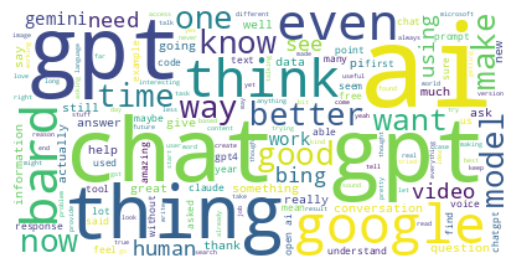

In [73]:
# Positive sentiment most common words

pos_text = " ".join(text for text in pos_df['clean_text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

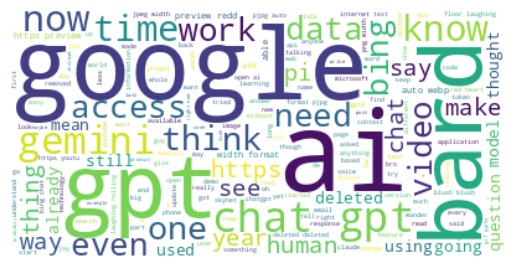

In [74]:
# Neutral sentiment most common words

neu_text = " ".join(text for text in neu_df['clean_text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neu_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

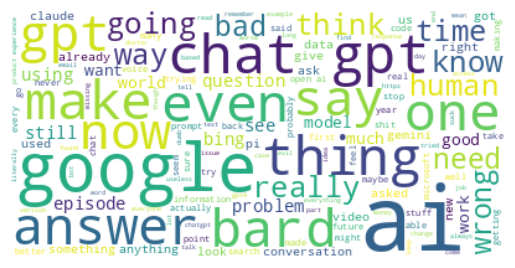

In [75]:
# Negative sentiment most common words

neg_text = " ".join(text for text in neg_df['clean_text'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

After taking out some nouns and verbs from the word list, the segregation between positive, neutral and negative sentiments were still not very clear.

## Word clouds of unigrams is very loosely linked to sentiment. It is better to do a phrase cloud. So let's explore multi-gram (bi- and tri-) gram frequencies.

# Using Susan's uni-/bi-/trigram visualizations
Reference: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

Testing out different x-gram lengths for positive sentiment.

In [76]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13"]) 

In [77]:
# Unigram

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(pos_df['clean_text'], 20)
# for word, freq in common_words:
#     print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in positive comments review after removing stop words')

In [78]:
# Bigram

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(pos_df['clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText', 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in positive sentiment comments after removing stop words')

chat gpt 414
open ai 107
laughing loud 57
bing chat 44
bing ai 31
context window 30
google gemini 30
sounds like 29
feels like 28
things like 27
feel like 26
just like 26
use cases 22
use ai 21
codebook vectors 21
language model 20
looks like 20
ll miss 20
code interpreter 19
ask questions 19


In [79]:
# Tri-grams

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=list(stop_words)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(pos_df['clean_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in positive sentiment comments after removing stop words') 

use chat gpt 15
rolling floor laughing 13
using chat gpt 12
like chat gpt 10
chat gpt better 9
accessed 16 2023 9
chat gpt just 9
en wikipedia org 9
wikipedia org wiki 9
asked chat gpt 8
gpt chat gpt 8
better chat gpt 8
robot robot robot 8
white check mark 8
reinforcement learning human 8
learning human feedback 8
gpt open ai 7
chat gpt bard 7
format pjpg auto 7
pjpg auto webp 7


Tri-grams helped build context, but also had redundant phrases with the same meaning. At sentence level, phrases may actually be distinct. 

# Positive, Neutral and Negative Sentiments at Uni/Bi and Trigram level

In [80]:
# Unigram

def get_top_n_words(corpus, n=None):
        vec = CountVectorizer(stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Unigrams. From top to bottom: positive, neutral and negative sentiments')    
sent_dfs = [pos_df, neu_df, neg_df]
for i in sent_dfs:
    
    common_words = get_top_n_words(i['text'], 20)
    # for word, freq in common_words:
    #     print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in comments review after removing stop words')

Unigrams. From top to bottom: positive, neutral and negative sentiments


There are a lot of similar words between different sentiments. Let us see what bigrams shows us.

In [81]:
# Bigram

def get_top_n_bigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (2,2), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Bigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in sent_dfs:
    
    common_words = get_top_n_bigram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 two-word phrases in comments review after removing stop words')

Bigrams. From top to bottom: positive, neutral and negative sentiments
 
chat gpt 50
don think 41
bing chat 40
don know 37
don need 32
bing ai 31
context window 30
google gemini 30
sounds like 29
feels like 28
things like 27
feel like 26
just like 25
use cases 22
use ai 21
codebook vectors 21
don want 20
language model 20
looks like 20
use chatgpt 20


preview redd 24
auto webp 24
format pjpg 20
pjpg auto 20
chat gpt 18
don know 14
jpeg width 13
bing chat 11
png width 11
gif giphy 10
width 1080 7
1080 format 7
bla bla 6
language model 5
ai generated 5
bing ai 5
make money 4
open ai 4
woke ai 4
world economic 4


bing chat 27
chat gpt 26
don know 16
marco polo 14
don need 12
bing ai 11
error message 11
don think 10
don want 10
use ai 10
searching doctor 10
generating answers 10
doctor episodes 10
language model 9
google search 9
code interpreter 9
episodes missing 9
feel like 8
sounds like 8
people think 8


Bigram's help more with distinguishing between positive, neutral and negative sentiments because there is more context. For example, during this run the features that are seemingly highlighted for each sentiment:

* positive: context window, Google gemini, codebook vectors
* neutral: modifying images
* negative: generating answers, code interpreter

This is closer to what was determined by unigrams alone. Still, would be nice to have qualities more closely aligned to metrics for chatbots as mentioned at the beginning of this notebook.

So let us take a look at longer-grams.

In [82]:
# Trigram

def get_top_n_trigram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (3,3), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('Trigrams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in sent_dfs:
    
    common_words = get_top_n_trigram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df2 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df2.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 three-word phrases in comments review after removing stop words')

Trigrams. From top to bottom: positive, neutral and negative sentiments
 
accessed 16 2023 9
en wikipedia org 9
wikipedia org wiki 9
format pjpg auto 7
pjpg auto webp 7
16 2023 gpt 6
token context window 6
modern science does 6
large language model 6
want make sure 6
problem solving abilities 5
key takeaways quick 5
takeaways quick navigation 5
image recognition voice 5
science does know 5
00 00 gemini 5
people don know 5
bingo bingo bingo 5
sorry prefer continue 5
prefer continue conversation 5


format pjpg auto 20
pjpg auto webp 20
width 1080 format 7
1080 format pjpg 7
png width 1080 4
x200b preview redd 4
format png auto 4
png auto webp 4
bla bla bla 3
world economic forum 3
jpeg width 1080 3
channel ai generated 2
needs understand context 2
жду нетерпением новых 2
нетерпением новых видео 2
self denounced conspiracy 2
denounced conspiracy theory 2
paging john conner 2
loud quiet loud 2
quiet loud quiet 2


description error message 8
doctor episodes lost 7
error message file 6
doctor lost episodes 6
reddit message compose 5
format png auto 5
png auto webp 5
3rd party apps 5
generating answers generating 5
answers generating answers 5
doctor marco polo 5
don need ai 4
custom profile data 4
chatgpt source watch 4
reddit chatgpt comments 4
message compose remindmebot 4
compose remindmebot subject 4
feedback suggestions regarding 4
suggestions regarding scenario 4
killing 3rd party 4


With three-word phrases, the phrases are redundant within each sentiment, but there is more context. 

For example, in postiive sentiment, these were mentioned:
* token context window
* problem-solving abilities
* quick key takeaways

At the same time, the topics of wikimedia and pictures came up, which are confusing since wikimedia is new and pictures came up in bigram's neutral sentiment. 
For trigram neutral and negative sentiments, there was a lot of noise.


Would be good to look into how multi-grams are formed.

# 6/15-gram/Sentence-level distribution

In [83]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13"]) 

In [84]:
# Seems like tri-gram still will not tell enough. So let's try out longer phrases

# Test on chatGPT data first
# get grams versus sentiment without creating pos, neu, and neg df's

chatgpt_df = df.loc[df['chatbot'] == 'ChatGPT']


pos_chatgpt_df = chatgpt_df.loc[chatgpt_df['sentiment_score'] >= 0.05]
neu_chatgpt_df = chatgpt_df.loc[(chatgpt_df['sentiment_score'] > -0.05) & (chatgpt_df['sentiment_score'] < 0.05)]
neg_chatgpt_df = chatgpt_df.loc[chatgpt_df['sentiment_score'] <= -0.05]

chatgpt_sent_dfs = [pos_chatgpt_df, neu_chatgpt_df, neg_chatgpt_df]

def get_top_n_sixgram(corpus, n=None):
        vec = CountVectorizer(ngram_range = (6,6), stop_words = list(stop_words)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

print('6-grams. From top to bottom: positive, neutral and negative sentiments')    
print (' ')
for i in chatgpt_sent_dfs:
    
    common_words = get_top_n_sixgram(i['text'], 20)
    for word, freq in common_words:
        print(word, freq)
    df3 = pd.DataFrame(common_words, columns = ['CommentsText' , 'count'])
    df3.groupby('CommentsText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 six-word phrases in comments review after removing stop words')

6-grams. From top to bottom: positive, neutral and negative sentiments
 
arc investigated version program running cloud 2
investigated version program running cloud computing 2
version program running cloud computing service 2
program running cloud computing service small 2
running cloud computing service small money 2
cloud computing service small money account 2
computing service small money account language 2
service small money account language model 2
small money account language model api 2
money account language model api able 2
account language model api able make 2
language model api able make money 2
model api able make money set 2
api able make money set copies 2
able make money set copies increase 2
make money set copies increase robustness 2
arc versions gpt evaluated ineffective autonomous 2
versions gpt evaluated ineffective autonomous replication 2
gpt evaluated ineffective autonomous replication task 2
evaluated ineffective autonomous replication task based 2


huggingface ibm dromedary 65b lora delta 2
ibm dromedary 65b lora delta v0 2
png width 1080 format pjpg auto 2
width 1080 format pjpg auto webp 2
don know annoyed flattered bots copying 2
know annoyed flattered bots copying comments 2
new gpt start learning beginning chat 1
gpt start learning beginning chat gpt 1
start learning beginning chat gpt gpt 1
add layers feed data statistical learning 1
layers feed data statistical learning learning 1
feed data statistical learning learning data 1
prod bit telling tell russia invaded 1
bit telling tell russia invaded ukraine 1
telling tell russia invaded ukraine feb 1
tell russia invaded ukraine feb 24 1
russia invaded ukraine feb 24 2022 1
invaded ukraine feb 24 2022 cutoff 1
ukraine feb 24 2022 cutoff date 1
pronounce word interesting inshting caused wild 1


description error message file upload fails 2
defaultmessage creator chat using custom profile 2
creator chat using custom profile meaningfully 2
chat using custom profile meaningfully change 2
using custom profile meaningfully change model 2
custom profile meaningfully change model responds 2
description disclaimer lack support code interpreter 2
disclaimer lack support code interpreter inline 2
lack support code interpreter inline images 2
support code interpreter inline images file 2
code interpreter inline images file downloads 2
interpreter inline images file downloads shared 2
inline images file downloads shared links 2
images file downloads shared links sharing 2
file downloads shared links sharing custom 2
downloads shared links sharing custom profile 2
shared links sharing custom profile data 2
github 0xdevalias chatgpt source watch blob 2
0xdevalias chatgpt source watch blob main 2
chatgpt source watch blob main changelog 2


Once again, there are more useful topics in positive sentiment. Still though, more grams brought more noise, which did not help in determining chatbot features connected to sentiment.

# Sentiment by ChatBot

In [85]:
y0 = df.loc[df['chatbot'] == 'ChatGPT']['sentiment_score']
y1 = df.loc[df['chatbot'] == 'Claude']['sentiment_score']
y2 = df.loc[df['chatbot'] == 'Bard']['sentiment_score']
y3 = df.loc[df['chatbot'] == 'Bing Chat']['sentiment_score']
y4 = df.loc[df['chatbot'] == 'Pi']['sentiment_score']

trace0 = go.Box(
    y=y0,
    name = 'ChatGPT',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Claude',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bard',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Bing Chat',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Pi',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot for Each Chat Bot"
)

fig = go.Figure(data=data,layout=layout)

iplot(fig)

In [86]:
# To understand the sample size.

df['chatbot'].value_counts()

chatbot
Bard         2281
ChatGPT      1693
Pi            717
Bing Chat     555
Claude        323
Name: count, dtype: int64

Let's take a look at the distribution if sentiment per chatbot was split between social app's: YouTube and Reddit.

In [87]:
youtube_df = df.loc[df['app'] == 'YouTube']
reddit_df = df.loc[df['app'] == 'Reddit']

In [88]:
# YouTube sentiment by chatbot

y0 = youtube_df.loc[youtube_df['chatbot'] == 'ChatGPT']['sentiment_score']
y1 = youtube_df.loc[youtube_df['chatbot'] == 'Claude']['sentiment_score']
y2 = youtube_df.loc[youtube_df['chatbot'] == 'Bard']['sentiment_score']
y3 = youtube_df.loc[youtube_df['chatbot'] == 'Bing Chat']['sentiment_score']
y4 = youtube_df.loc[youtube_df['chatbot'] == 'Pi']['sentiment_score']

trace0 = go.Box(
    y=y0,
    name = 'ChatGPT',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Claude',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bard',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Bing Chat',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Pi',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "YouTube: Sentiment Polarity Boxplot for Each Chat Bot"
)

fig = go.Figure(data=data,layout=layout)

iplot(fig)

In [89]:
# Reddit sentiment by chatbot

y0 = reddit_df.loc[reddit_df['chatbot'] == 'ChatGPT']['sentiment_score']
y1 = reddit_df.loc[reddit_df['chatbot'] == 'Claude']['sentiment_score']
y2 = reddit_df.loc[reddit_df['chatbot'] == 'Bard']['sentiment_score']
y3 = reddit_df.loc[reddit_df['chatbot'] == 'Bing Chat']['sentiment_score']
y4 = reddit_df.loc[reddit_df['chatbot'] == 'Pi']['sentiment_score']

trace0 = go.Box(
    y=y0,
    name = 'ChatGPT',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Claude',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Bard',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Bing Chat',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Pi',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Reddit: Sentiment Polarity Boxplot for Each Chat Bot"
)

fig = go.Figure(data=data,layout=layout)

iplot(fig)

Need to keep in mind that not all chatbots have the same number of comments. So best to normalize these numbers to get average sentiment per chatbot comments, but can lose granularity in data. 

Given overall picture, looks like chatGPT even with high amount of user feedback, is mostly positive with some definite very negative outliers. The same is for Claude when looking at YouTube comments. Then it is Pi, Bing Chat and then Bard last in most positive ranking. 

Differences in general sentiment happen when looking at sentiment scores between YouTube and Reddit. However, general sentiment is best to look at since platform diffrences only showcase diversity of comment available (Reddit more diverse).  

There is more variance with Reddit comments which is expected since YouTube video comments were expected to be more homogenous. Each video had one particular theme and many commentators just respond in on way usually without any conversation swaying in multiple directions. However, for Reddit comments, the conversation can go deep and in many directions. 

# Distribution of Sentiment Over Time 
### Previewing with ChatGPT first

In [90]:
# Change published_at to date only. Aggregate the data.
chatgpt_df['published_at'] = pd.to_datetime(chatgpt_df['published_at'], format='%Y-%m-%dT%H:%M:%SZ')
chatgpt_df['published_at_date'] = chatgpt_df['published_at'].dt.date
chatgpt_df2 = chatgpt_df[['published_at_date', 'sentiment_score']]
chatgpt_df2.groupby(chatgpt_df2['published_at_date'], as_index=False).mean()

published_at_date  sentiment_score
0          2023-03-14         0.279670
1          2023-03-15         0.265737
2          2023-03-16         0.150853
3          2023-03-17         0.173944
4          2023-03-18         0.304877
..                ...              ...
107        2023-12-09        -0.599400
108        2023-12-18        -0.340800
109        2023-12-20         0.885800
110        2023-12-21         0.622900
111        2023-12-28        -0.476700

[112 rows x 2 columns]

In [91]:
chatgpt_df['published_at_date'].min(), chatgpt_df['published_at_date'].max()

(datetime.date(2023, 3, 14), datetime.date(2023, 12, 28))

In [92]:
chatgpt_df3 = chatgpt_df2.groupby(chatgpt_df2['published_at_date'], as_index=False).mean()
chatgpt_df3

published_at_date  sentiment_score
0          2023-03-14         0.279670
1          2023-03-15         0.265737
2          2023-03-16         0.150853
3          2023-03-17         0.173944
4          2023-03-18         0.304877
..                ...              ...
107        2023-12-09        -0.599400
108        2023-12-18        -0.340800
109        2023-12-20         0.885800
110        2023-12-21         0.622900
111        2023-12-28        -0.476700

[112 rows x 2 columns]

In [93]:
# Checking to see if aggregation worked
len(chatgpt_df2), len(chatgpt_df3)

(1693, 112)

In [94]:
# Graph the data at non-aggregate level

fig = px.line(chatgpt_df, x="published_at", y=chatgpt_df['sentiment_score'],
              hover_data={"published_at": "|%B %d, %Y"},
              title='ChatGPT Sentiment Over Time (non-aggregated)')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [95]:
# Graph the data at aggregate level

fig = px.line(chatgpt_df3, x="published_at_date", y=chatgpt_df3['sentiment_score'],
              hover_data={"published_at_date": "|%B %d, %Y"},
              title='ChatGPT Sentiment Over Time (Date)')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [96]:
chatgpt_df.sort_values(by='published_at', ascending=True)[0:10]

author        published_at  like_count  \
596        @savlecz1187 2023-03-14 21:18:00          19   
595            @Powolny 2023-03-14 21:18:05           1   
594           @jeffwads 2023-03-14 21:18:12           8   
593            @DrHanes 2023-03-14 21:18:38           2   
592  @michaelharvey1701 2023-03-14 21:19:12           1   
591   @RakibHasan-um5xi 2023-03-14 21:20:06           1   
590    @andersonsystem2 2023-03-14 21:21:14           0   
589    @RainbowSixIntel 2023-03-14 21:21:37           2   
588    @MrDarthlizard32 2023-03-14 21:23:50           9   
587              @DBREW 2023-03-14 21:28:05           3   

                                                                                                                  text  \
596  The livestream that just ended was amazing as well. Can't wait to actually get my hands on all these new features   
595                                                                                                             First!   
594                                                                                         Fun times and scary times.   
593                                                                                      Yeehaaa thanks for the Infos!   
592                                                                                                                1st   
591                                                                                                                 ❤❤   
590          I been trying it out GPT4 using the Poe app and Claude plus. They are both very good models. Good video 🎉   
589                                                                   Just watched the video by open ai, great timing!   
588                                                                                                You're a true hero.   
587                                                                         Anyone have a link to the technical paper?   

     chatbot published_at_date  published_at_month      app  \
596  ChatGPT        2023-03-14                   3  YouTube   
595  ChatGPT        2023-03-14                   3  YouTube   
594  ChatGPT        2023-03-14                   3  YouTube   
593  ChatGPT        2023-03-14                   3  YouTube   
592  ChatGPT        2023-03-14                   3  YouTube   
591  ChatGPT        2023-03-14                   3  YouTube   
590  ChatGPT        2023-03-14                   3  YouTube   
589  ChatGPT        2023-03-14                   3  YouTube   
588  ChatGPT        2023-03-14                   3  YouTube   
587  ChatGPT        2023-03-14                   3  YouTube   

                                                                                                               clean_text  \
596    the livestream that just ended was amazing as well. can 't wait to actually get my hands on all these new features   
595                                                                                                               first !   
594                                                                                            fun times and scary times.   
593                                                                                        yeehaaa thanks for the infos !   
592                                                                                                                   1st   
591                                                                                                   red heart red heart   
590  i been trying it out gpt4 using the poe application and claude plus. they are both very good models. good video tada   
589                                                                      just watched the video by open ai, great timing!   
588                                                                                                  you are a true hero.   
587                                                                            a

When looking at non-aggregated data, looks like there was huge variance in sentiment when YouTube video on chatGPT first came out in March 2023. After aggregating, can see at date level, the overall sentiment in March being positive with a clear dip on March 27th. Then user response tapered off with majority of sentiment being positive with some clear dips On April 4th and July 15th. This sort of data can be used when monitoring product feature releases :).

# Time Series of Sentiment over Time Split by Chatbot

In [97]:
# get date from published_at
# get pivoted data with video having its own column to pivot by if need be
# average sentiment score value aggregated by date

In [98]:
test = df
test2 = test.copy()
test2['chatbot'].value_counts().index

Index(['Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'], dtype='object', name='chatbot')

In [99]:
for c in test2['chatbot'].value_counts().index:

    test2[c]=(np.select([test2['chatbot'].eq(c)],
                        [test2['sentiment_score']        
                        ])) 
test3 = test2[['published_at_date', 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat']]
test3.head(2)

published_at_date  ChatGPT   Pi  Bard  Claude  Bing Chat
0        2023-07-15  -0.3400  0.0   0.0     0.0        0.0
1        2023-06-25  -0.0772  0.0   0.0     0.0        0.0

In [100]:
test3['published_at_date'].min(), test3['published_at_date'].max()

(datetime.date(2023, 3, 12), datetime.date(2023, 12, 30))

In [101]:
# Mean aggregate of sentiment scores by date for each chatbot column
test4 = test3.groupby(test3['published_at_date'], as_index=False).mean()
test4

published_at_date   ChatGPT   Pi      Bard    Claude  Bing Chat
0          2023-03-12  0.000000  0.0  0.000000  0.000000   0.306479
1          2023-03-13  0.000000  0.0  0.000000  0.000000   0.115400
2          2023-03-14  0.277628  0.0  0.000000  0.000000   0.006339
3          2023-03-15  0.253191  0.0  0.000000  0.000000   0.010231
4          2023-03-16  0.100569  0.0  0.000000  0.000000   0.026596
..                ...       ...  ...       ...       ...        ...
257        2023-12-26  0.000000  0.0 -0.184037  0.000000   0.000000
258        2023-12-27  0.000000  0.0  0.100767  0.000000   0.000000
259        2023-12-28 -0.034050  0.0  0.081964  0.042814   0.000000
260        2023-12-29  0.000000  0.0  0.021744  0.000000   0.000000
261        2023-12-30  0.000000  0.0  0.419900  0.000000   0.000000

[262 rows x 6 columns]

In [102]:
# Seeing if aggregation did indeed condense df
len(test3), len(test4)

(5569, 262)

In [103]:
fig = px.line(test4, x="published_at_date", y=test4.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Graph is too crowded to easily track sentiment trends per chatbot. Best to separate into 2/3 different multi-line time series graphs.

In [104]:
# Split Chatbots based on user response volume

comments_high = test4[['published_at_date', 'ChatGPT', 'Pi']]
comments_low = test4[['published_at_date', 'Bard', 'Claude', 'Bing Chat']]

fig = px.line(comments_high, x="published_at_date", y=comments_high.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [105]:
fig = px.line(comments_low, x="published_at_date", y=comments_low.columns,
              hover_data={"published_at_date": "|%B %d, %Y"},
              title="Chatbots' Sentiment Over Time")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

Need to make sure don't really look at 0 values since filler values when sentiment average taken at date level. Also, collection of sentiment data started at different times so 0 values filled in during gaps in data collection. 

Overall, chatGPT has high sentiment whereas Pi has more overall low points. When comparing Bard vs Claude vs Bing Chat, we can see that there is a lot of reaction to each chatbot during different times of the year. Need to make sure that this is not due to when video is released, but rather around certain feature release. Can easily separate the two by graphing feature release schedule in same graph.

Also, need to keep in mind that this data population is from low volume of user comments. So this is not the whole picture.

# 2D Density Jointplot of Sentiment vs. Month in 2023

In [106]:
# Let's see if there is a sentiment sweet spot for all chatbots and separately for months in 2023 (will show when competition was high amongst all chatbots to see when companies needed to seek differentiator)
df['published_at_month'] = df['published_at'].dt.month
df.head(1)

author        published_at  like_count  \
0  @ozramblue117 2023-07-15 06:52:27           0   

                                                                                                               text  \
0  What scares me is that if this is what’s publicly available, what have the military got and where’s it at now? 😅   

   chatbot published_at_date  published_at_month      app  \
0  ChatGPT        2023-07-15                   7  YouTube   

                                                                                                                     clean_text  \
0  what scares me is that if this is what is publicly available, what have the military got and where is it at now? sweat smile   

   sentiment_score  word_count  text_len  
0            -0.34          25       124

In [107]:
def jointplot(chatbot_df):
    trace1 = go.Scatter(
        x=chatbot_df['sentiment_score'], y=chatbot_df['published_at_month'], mode='markers', name='points',
        marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
    )
    trace2 = go.Histogram2dContour(
        x=chatbot_df['sentiment_score'], y=chatbot_df['published_at_month'], name='density', ncontours=20,
        colorscale='Hot', reversescale=True, showscale=False
    )
    trace3 = go.Histogram(
        x=chatbot_df['sentiment_score'], name='Sentiment polarity density',
        marker=dict(color='rgb(102,0,0)'),
        yaxis='y2'
    )
    trace4 = go.Histogram(
        y=chatbot_df['published_at_month'], name='Month density', marker=dict(color='rgb(102,0,0)'),
        xaxis='x2'
    )
    data = [trace1, trace2, trace3, trace4]

    layout = go.Layout(
        showlegend=False,
        autosize=False,
        width=600,
        height=550,
        xaxis=dict(
            domain=[0, 0.85],
            showgrid=False,
            zeroline=False
        ),
        yaxis=dict(
            domain=[0, 0.85],
            showgrid=False,
            zeroline=False
        ),
        margin=dict(
            t=50
        ),
        hovermode='closest',
        bargap=0,
        xaxis2=dict(
            domain=[0.85, 1],
            showgrid=False,
            zeroline=False
        ),
        yaxis2=dict(
            domain=[0.85, 1],
            showgrid=False,
            zeroline=False
        )
    )

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)

jointplot(df)

As expected, the highest sentiment is 0, but a lot of it can be from data manipulation. The highest volume of comments are from March, September and December. 

This verified some of the above conclusions from prior time series sentiment trends. Highest volume of comments and sentiment scores (ignorning 0) come from March and most likely from ChatGPT. Best to break this visualization down into different chatbots to see where volume of comments and highest sentiment score lie since could be the case that chatGPT is overpowering the other chatbot data.

In [108]:
df['chatbot'].value_counts()

chatbot
Bard         2281
ChatGPT      1693
Pi            717
Bing Chat     555
Claude        323
Name: count, dtype: int64

In [109]:
# Sentiment Score by Comment Publication Month broken down by different chatbots
chatbots = ['ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat']
chatbots_df = []
for i in chatbots:
    subset = df.loc[df['chatbot'] == i]
    chatbots_df.append(subset)
print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")

for c in chatbots_df:
    jointplot(c)

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


* ChatGPT: most comments from March, September, November and heavily neutral with positive

* Pi: Most in May and July with high positive sentiment in July

* Bard: highest volume of comments in December and mostly neutral with high variety in December

* Claude: highest volume of comments in July with huge range of sentiment spanning from negative to positive

* Bing Chat: Highest volume of comments in April and May with mostly positive

# Sentiment by Likes by Chatbot

In [110]:
# Scatterplot to see where sentiment score goes as likes count increases. The desired result for each chatbot is that as each like increases so does sentiment score (positive correlation)
def scatterplot(df):
    fig = px.scatter(df, x="like_count", y="sentiment_score", title='Like counts and corresponding sentiment')
    return fig.show()
scatterplot(df)

Majority of comments have no likes. And for those with noteworthy amount are spread across sentiment specturm. So let's break this down by chatbot.


In [111]:
print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")
for c in chatbots_df:
    scatterplot(c)

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


* ChatGPT: lot of the many liked comments are positive

* Pi: Mostly positive

* Bard: Lot of positive with negative slant as well

* Claude: Mostly positive (need to factor in small sample size)

* Bing Chat: High amount of negative and positive (mixed) 

# Distribution of Sentiment by Comment Length

In [112]:
# The assumption is that most people have more to say when they really don't like or like something. Same goes for reviews in general.
def scatterplot(df):
    fig = px.scatter(df, x="text_len", y="sentiment_score", title='Comment length and corresponding sentiment')
    return fig.show()
scatterplot(df)

This proves the assumption that longest comments will come from two ends of the sentiment spectrum (really positive and really negative experiences). Let us split the data between chatbots to see if this pattern continues.

In [113]:
print("From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'")
for c in chatbots_df:
    scatterplot(c)

From top to bottom: 'ChatGPT', 'Pi', 'Bard', 'Claude', 'Bing Chat'


Where most long comments fell on sentiment spectrum:

* ChatGPT: high positive

* Pi: positive

* Bard: positive and negative

* Claude: positive

* Bing Chat: positive and negative

# Domain specific words/Technical jargon associated with each sentiment

In [114]:
# What do terms in GI differ from regular English language

# Following are the terms that differentiate the comments from a general English corpus

corpus = st.CorpusFromPandas(df, category_col='chatbot', text_col='clean_text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['gpt', 'chatgpt', 'bing', 'bard', 'openai', 'reddit', 'ai', 'llm', 'chatbot', 'gemini']


This looks about right except for reddit (noise).

# Topic Modeling

In [115]:
df['chatbot'].value_counts().index

Index(['Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'], dtype='object', name='chatbot')

In [116]:
#Terms most associated with particular chatbots

def chatbot_topics(corpus, chatbot):
    term_freq_df = corpus.get_term_freq_df()
    term_freq_df['Score'] = corpus.get_scaled_f_scores(chatbot)
    return pprint(list(term_freq_df.sort_values(by='Score', ascending=False).index[:10]))

print("From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'")
for i in df['chatbot'].value_counts().index:
    chatbot_topics(corpus, i) 

From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'
['1 +',
 'gemini',
 'bard is',
 'multimodal',
 'gemini is',
 'bard',
 'google',
 '+',
 'google is',
 'emails']
['power',
 'file',
 'feature',
 '3.5',
 'of it',
 '2021',
 '$',
 'the model',
 'upload',
 'custom']
['pi',
 'debate',
 'with pi',
 'pi is',
 'codebook',
 'vectors',
 'or no',
 'yes or',
 'codebook vectors',
 'inflection']
['episodes',
 'doctor who',
 'episodes the',
 'doctor',
 'bing ai',
 'breakthrough',
 'bing chat',
 'bing',
 'engines',
 'mode']
['claude',
 'claude 2',
 'anthropic',
 'with claude',
 'claude is',
 'claude and',
 'code interpreter',
 'to claude',
 'interpreter',
 'quantum']


What would be nice is to elminate the nouns that are tied to the chatbot itself such as pi, bard, claude, etc. This is noise when looking for words that reveal distinguishing features between chatbots. 

At the same time, when manually ignorning the noise, ChatGPT list does show some key characteristcs connected to sentiment towards it: power. Also, in general, key features of each chatbot was mentioned Bard - multimodal, Pi - inflection, Bing Chat - breakthrough & engines, Claude - code interpreter

It would be nice to see the split of topics by sentiment, which is what we have been after. So let's do that.

In [117]:
# Need to first get corpuses for each sentiment
# Then feed that into script to extract topics per chatbot to see what defines positive sentiment and other sentiments for all chatbots

print("From top to bottom: positive, neutral and negative sentiments.")

sent_corpus = []

for s_df in sent_dfs:
    corpus = st.CorpusFromPandas(s_df, category_col='chatbot', text_col='clean_text', nlp=nlp).build()
    sent_corpus.append(corpus)
    print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

From top to bottom: positive, neutral and negative sentiments.
['gpt', 'chatgpt', 'bing', 'bard', 'openai', 'chatbot', 'stockfish', 'reddit', 'llm', 'nerfed']
['chatgpt', 'gpt', 'openai', 'clickbait', 'tldr', 'vqd', 'phind', 'avanco', 'quora', 'replika']
['chatgpt', 'gpt', 'openai', 'hallucinates', 'lobotomized', 'bing', 'covid', 'chatbots', 'gaslighting', 'pichai']


There are some terms that span across sentiments. If just looking at lists alone, would be difficult to see which is the dominant sentiment of ChatGPT since it is in all three sentiments at high frequency. 

To have better topics, best to eliminate common words/adjectives that are too highlevel at the stage of sentiment EDA e.g. wordcloud 

Let's try and distinguish sentiments at chatbot level.

## Positive sentiment topics broken down by chatbot

In [118]:
# Looking at each sentiments' topics at chatbot level. 
# For pos, neu, neg corpuses, look at topics specific to chatbot and see if positive sentiment for each chatbot can be attributed to different features.
# How: loop though sent_corpus and apply topic modeling to each chatbot

print("POSITIVE SENTIMENT. From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'")

for i in df['chatbot'].value_counts().index:             
    chatbot_topics(sent_corpus[0], i) 

POSITIVE SENTIMENT. From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'
['1 +',
 'gemini',
 'multimodal',
 'bard is',
 'bard',
 '+',
 '1',
 "gemini 's",
 'google',
 'gemini is']
['power',
 'money',
 '3.5',
 'of it',
 '$',
 'totally',
 'already',
 'itself',
 'language',
 'use it']
['pi',
 'codebook',
 'vectors',
 'with pi',
 'codebook vectors',
 'pi is',
 'talking to',
 'word',
 'she',
 'to talk']
['bing ai',
 'breakthrough',
 'bing chat',
 'bingo',
 'bing',
 'mode',
 'engines',
 'the information',
 'bing is',
 'need it']
['claude',
 'claude 2',
 'anthropic',
 'interpreter',
 'code interpreter',
 'with claude',
 'claude is',
 'ukraine',
 'a.i .',
 'claude and']


Looks very similar to the topic breakdown per chatbot when corpus was not split by sentiment.

In [119]:
print("NEUTRAL SENTIMENT. From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'")

for i in df['chatbot'].value_counts().index:
    chatbot_topics(sent_corpus[1], i) 

NEUTRAL SENTIMENT. From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'
['gemini',
 'blush',
 'google',
 'bard',
 'skynet',
 'emails',
 'floor',
 'the floor',
 'rolling',
 'blush blush']
['4',
 'to use',
 'read',
 'feature',
 'chatgpt',
 'prompt',
 'most',
 'cutoff',
 '2021',
 'image']
['pi',
 'name',
 'voice',
 'based',
 'pi is',
 'have the',
 'how are',
 'talks',
 'name you',
 'i name']
['bing ai',
 'bing',
 'bing is',
 'bing chat',
 '120',
 'seconds long',
 'else',
 'seconds',
 'context of',
 'exactly']
['claude',
 'claude 2',
 'poe',
 'its a',
 'let us',
 'says it',
 '2',
 'that you',
 'both',
 'tree']


# Neutral sentiment topics broken down by chatbot

* Bard: blush? seems more negative than neutral
* ChatGPT: prompt, cutoff - why would something critical to positive/negative experience be under neutral sentiment
* Pi: projection
* Bing Chat: seconds long - seems to be non-neutral term
* Claude: bunch of neutral nouns and general actions

Despite this coming from netural corpus, has so far the most helpful words related to features to link to sentiment.

In [120]:
print("NEGATIVE SENTIMENT. From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'")

for i in df['chatbot'].value_counts().index:
    chatbot_topics(sent_corpus[2], i) 

NEGATIVE SENTIMENT. From top to bottom: 'Bard', 'ChatGPT', 'Pi', 'Bing Chat', 'Claude'
['gemini',
 '= =',
 'google',
 'bard',
 'bard is',
 'fake',
 'spam',
 '=',
 'emails',
 'release']
['custom profile',
 'profile',
 'upload',
 'default',
 'file upload',
 'custom',
 'file',
 'the model',
 'd',
 'description']
['debate',
 'pi',
 'cuss',
 'cuss gpt',
 'or no',
 'yes or',
 'with pi',
 'of debate',
 'conclusion',
 'the bot']
['doctor who',
 'episodes',
 'episodes the',
 '4 episodes',
 'doctor',
 'polo',
 'marco',
 'marco polo',
 'season',
 'searching']
['claude',
 'token',
 'claude and',
 'apologize but',
 'claude is',
 'token limit',
 'regarding',
 'i apologize',
 'apologize',
 'with claude']


### Negative sentiment topics broken down by chatbot

These seem more in line with negative sentiment

* Bard: fake, spam, releases
* ChatGPT: custom profile
* Pi: cusss
* Bing Chat: searching
* Claude: apologize, token limit

For this sentiment, there are chatbot features that are linked to a user sentiment. Yay! Would be great to see in visualization positive, neutral and negative sentiment words between multiple chatbots.

Something to note is that if the overall sentiment of a chatbots' sentiment is positive then its topic list by sentiment will be similar to topic list at general level. This is why having phrases would be best when classifying sentiment.

In [121]:
#Scattertext to visualize words/phrases by sentiment

# First try looking at whole corpus - all chatbots to see what are favorable qualities and not
# Then look at specific chatbots to see what is favorable and not
# look at how this viz compares to topic modeling

## ScatterText 
AKA Enhanced Confusion Matrix

Reference: https://github.com/JasonKessler/scattertext#using-scattertext-as-a-text-analysis-library-finding-characteristic-terms-and-their-associations

In [122]:
# reviews_df = pd.read_csv('https://github.com/JasonKessler/ICLR18ReviewVis/raw/master/iclr2018_reviews.csv.bz2')
# reviews_df['parse'] = reviews_df['review'].apply(st.whitespace_nlp_with_sentences)
# full_corpus = (st.CorpusFromParsedDocuments(reviews_df,
#                                             category_col='category',
#                                             parsed_col='parse',
#                                             #feats_from_spacy_doc=st.PhraseMachinePhrases()
#                                             ).build())

# term_ranker = st.OncePerDocFrequencyRanker
# corpus = (full_corpus
#           .keep_only_these_categories(['Accept, Positive', 'Accept, Negative',
#                                        'Reject, Positive', 'Reject, Negative'],
#                                       False)
#           .get_unigram_corpus()
#           .select(st.ClassPercentageCompactor(term_count=5)))


# priors = (st.PriorFactory(full_corpus, starting_count=0.01)
#           .use_all_categories()
#           .get_priors())

In [123]:
# four_square = st.FourSquare(
# 	corpus,
# 	category_a_list=['Accept, Positive'],
# 	not_category_a_list=['Reject, Negative'],
# 	category_b_list=['Accept, Negative'],
# 	not_category_b_list=['Reject, Positive'],
# 	term_ranker=term_ranker,
# 	scorer=st.LogOddsRatioInformativeDirichletPrior(priors, 500, 'word'),
# 	labels={'a': 'Positive Reviews of Accepted Papers',
# 	        'b': 'Negative Reviews of Accepted Papers',
# 	        'not_a_and_not_b': 'Rejections',
# 	        'a_and_b': 'Acceptances',
# 	        'a_and_not_b': 'Positive Reviews',
# 	        'b_and_not_a': 'Negative Reviews',
# 	        'not_a': 'Negative Reviews of Rejected Papers',
# 	        'not_b': 'Positive Reviews of Rejected Papers',
# 	        }
# )

# html = st.produce_four_square_explorer(four_square=four_square,
#                                        x_label='Pos-Neg',
#                                        y_label='Accept-Reject',
#                                        num_terms_semiotic_square=5,
#                                        minimum_term_frequency=0,
#                                        pmi_threshold_coefficient=0,
#                                        term_ranker=term_ranker,
#                                        metadata=(corpus._df['category'] + ': '
#                                                  + corpus._df.rating + ', '
#                                                  + corpus._df['title']))

In [124]:
# file_name2 = 'pub_acc.html'
# with open(file_name2, 'w') as outf: outf.write(html)
# rel_report_path = os.path.relpath(file_name2)   
# display(IFrame(file_name2, width=2000, height=700))

In [125]:
# **This graph discounts neutral sentiment**
# need to get sentiment as "pos"/"neg"
# need to get ChatGPT and Claude rows only
# create new column with combination of sentiment and chatbot
# create column with parsed text (unigram/bigram?)

In [126]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

def sentiment(df):
    
    if df['sentiment_score'] >= 0.05:
        return 'Positive'
    elif df['sentiment_score'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
df['sentiment'] = df.apply(sentiment, axis = 1)
df.head()

author        published_at  like_count  \
0      @ozramblue117 2023-07-15 06:52:27           0   
1       @lenkaa.9955 2023-06-25 09:33:43           0   
2     @decoyuser1506 2023-05-18 13:06:00           2   
3  @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4          @RosscoAW 2023-05-09 23:07:20           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [127]:
df['sentiment'].value_counts()

sentiment
Positive    2805
Neutral     1426
Negative    1338
Name: count, dtype: int64

In [128]:
# Grab only ChatGPT and Claude rows
chat_claude_df = df.loc[df['chatbot'].isin(['ChatGPT', 'Claude'])]
chat_claude_df.head()

author        published_at  like_count  \
0      @ozramblue117 2023-07-15 06:52:27           0   
1       @lenkaa.9955 2023-06-25 09:33:43           0   
2     @decoyuser1506 2023-05-18 13:06:00           2   
3  @ABRARAHMAD-ul8gu 2023-05-16 17:44:42           0   
4          @RosscoAW 2023-05-09 23:07:20           0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [129]:
# define category column
chat_claude_df['category'] = chat_claude_df['chatbot'] + ', ' + chat_claude_df['sentiment']
chat_claude_df['category'].value_counts()

category
ChatGPT, Positive    933
ChatGPT, Neutral     442
ChatGPT, Negative    318
Claude, Positive     156
Claude, Negative      95
Claude, Neutral       72
Name: count, dtype: int64

In [130]:
stop_words = text.ENGLISH_STOP_WORDS.union(["www", "youtube", "br", "href", "https", "39", "com", "2adksywb6ly", "re", "amp", "youtu", "eadaqil_ak0", "45", "5m45s", "quot", "xrnokbkcue0", "12", "13", "3", "5", "4", "2", "s", "claude", "anthropic"]) 

In [131]:
chat_claude_df['parse'] = chat_claude_df['clean_text'].apply(st.whitespace_nlp_with_sentences)

full_corpus = (st.CorpusFromParsedDocuments(chat_claude_df,
                                            category_col='category',
                                            parsed_col='parse')
                                            .build()
                                            .remove_terms(stop_words, ignore_absences=True)
                                            )

term_ranker = st.OncePerDocFrequencyRanker
corpus = (full_corpus 
          .keep_only_these_categories(['ChatGPT, Positive', 'ChatGPT, Negative',
                                       'Claude, Positive', 'Claude, Negative'],
                                      False)
          .get_unigram_corpus() # try to see what happens if this changed to bigram
          .select(st.ClassPercentageCompactor(term_count=5)))


priors = (st.PriorFactory(full_corpus, starting_count=0.01)
          .use_all_categories()
          .get_priors())

four_square = st.FourSquare(
    corpus,
    category_a_list=['ChatGPT, Positive'],
    not_category_a_list=['Claude, Negative'],
    category_b_list=['ChatGPT, Negative'],
    not_category_b_list=['Claude, Positive'],
    term_ranker=term_ranker,
    scorer=st.LogOddsRatioInformativeDirichletPrior(priors, 500, 'word'),
    labels={'a': 'Positive Comments of ChatGPT',
            'b': 'Negative Comments of ChatGPT',
            'not_a_and_not_b': 'Claude',
            'a_and_b': 'ChatGPT',
            'a_and_not_b': 'Positive Comments',
            'b_and_not_a': 'Negative Comments',
            'not_a': 'Negative Comments of Claude',
            'not_b': 'Positive Comments of Claude',
            }
)

html = st.produce_four_square_explorer(four_square=four_square,
                                       x_label='Positive-Negative',
                                       y_label='ChatGPT-Claude',
                                       num_terms_semiotic_square=5,
                                       minimum_term_frequency=0,
                                       pmi_threshold_coefficient=0,
                                       term_ranker=term_ranker)

file_name3 = 'chatgpt_claude_sent.html' #
with open(file_name3, 'w') as outf: outf.write(html)
rel_report_path = os.path.relpath(file_name3)   
display(IFrame(file_name3, width=2000, height=700))

Excellent! The visualization with ChatGPT vs Claude with grams and sentiment plotted. Next iteration is look at multi-word/phrases categorized into different sentiments. :)

## Looking at topics via LSA. 
This will help look at topics at tri-gram level which we have been wanting to explore.

In [132]:
reindexed_data = df['clean_text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

In [133]:
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [134]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [135]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [136]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

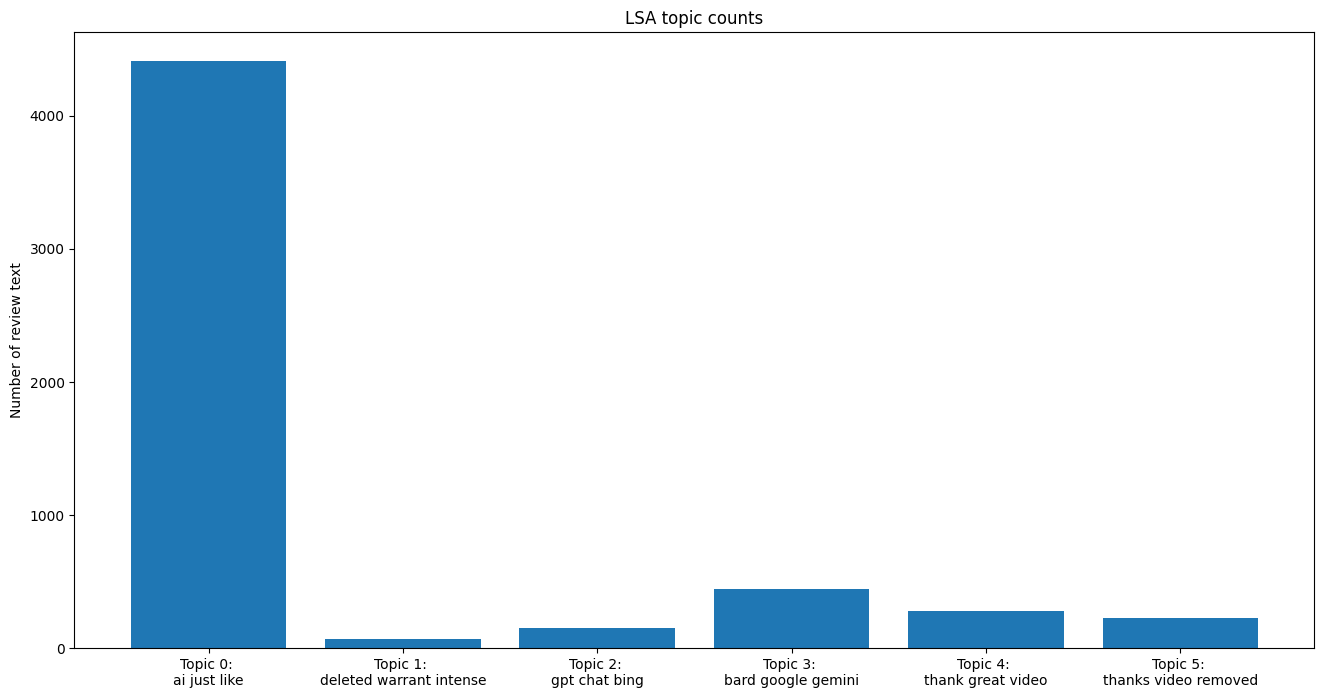

In [137]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.show();

The topic with highest amount of comments makes sense since this in general covers all chatbots and the chatbot topics. In order to get better differentiation between topics, could scrape more app's such as LinkedIn. If there is not much improvement there, then it is clear that topic modeling algorithms have its limitations.

In [138]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5569 samples in 0.004s...
[t-SNE] Computed neighbors for 5569 samples in 0.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5569
[t-SNE] Computed conditional probabilities for sample 2000 / 5569
[t-SNE] Computed conditional probabilities for sample 3000 / 5569
[t-SNE] Computed conditional probabilities for sample 4000 / 5569
[t-SNE] Computed conditional probabilities for sample 5000 / 5569
[t-SNE] Computed conditional probabilities for sample 5569 / 5569
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.080986
[t-SNE] KL divergence after 2000 iterations: 1.018309


In [139]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        reviews_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                reviews_in_that_topic.append(two_dim_vectors[i])    
        
        reviews_in_that_topic = np.vstack(reviews_in_that_topic)
        mean_review_in_that_topic = np.mean(reviews_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_review_in_that_topic)
    return mean_topic_vectors

In [140]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [141]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

With any clustering, you want to see clear distinct groups and observe the nearness of neighboring groups.

This is a cool twist on previous bar chart by showing relationship of topics to one another. Size of clusters make sense as well since it shows how popular a phrase is. Really awesome! Would be nice to see sentiment represented here with clusters colored with respective sentiment score. Would have given that extra touch. For next iteration, that would be possible! For now, let's make our concluding marks.

_____

# Conclusion on Online Sentiment of Chatbots Big and Not-So-Big Players in 2023